In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
%matplotlib inline
figures_path = '/Users/erezcohen/Desktop/Projects/2NSRC/SmallNoteGenRec/Figures/'

In [47]:

ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[110,141,146,147.5,145.5],# average of HO and WS
                        'nl00':[110,157,166,173.,177.5]},# average of HO and WS
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 40 , 56 , 208], # 3 , 
                        's_t':[90 , 138.6174 , 142.6555 , 132.5117 , 151.3311]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[165.8 , 188.3 , 198.8]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])
BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])
WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

def plot_data(data , ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=1000*data['sigma_'+direction+'_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth
                , fmt=fmt,label=label)

def plot_data_assymetric(data , unc_name='tot', ax=None, direction='t', Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, capthick=0, capsize=5,
                       vary=None , varyerr=None , label=None , facecolors=None ):
    ax.errorbar((data['A']+Ashift), 
                y=1000*data['sigma_'+direction+'_final'],
                yerr=[1000*data['sigma_'+direction+'_final_dw_err_'+unc_name],1000*data['sigma_'+direction+'_final_up_err_'+unc_name]],
                color=color, marker=marker,markersize=markersize,linewidth=linewidth,capthick=capthick,capsize=capsize,
                fmt=fmt,label=label)        
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    from scipy.interpolate import interp1d
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')
    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)
    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )
    # return the interpolation of the line
    return f

In [3]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,
                                          do_Ciofi=True):
    from scipy.interpolate import interp1d

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
    plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
    plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=35)
    return ax

def plot_A_depdendence_sigma_t(data=None,
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(140,184), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')

# generated vs. reconstructed in bins of generated

In [4]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] # ,'Mott','DipoleFF2'
data_allPmiss_PrecFid , data300Pmiss600_PrecFid = dict() , dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss_PrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )
    data300Pmiss600_PrecFid[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

In [5]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["PrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
    cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
    cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
    cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
    
    
    # weighted average
    sigma_x, Dsigma_x = cm_pars['sigma_x_before_acc_corr'], cm_pars['sigma_x_before_acc_corr_err']
    sigma_y, Dsigma_y = cm_pars['sigma_y_before_acc_corr'], cm_pars['sigma_y_before_acc_corr_err']
    sigma_t = (sigma_x/np.square(Dsigma_x)+sigma_y/np.square(Dsigma_y))/( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y))
    cm_pars['sigma_t_before_acc_corr'] = sigma_t    
    Dsigma_t = np.sqrt(1./( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y) ))
    cm_pars['sigma_t_before_acc_corr_err'] = Dsigma_t
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars
cm_parameters[Fiducials]

,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,sigma_zErr_unweighted,sigma_z_unweighted,target,A,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,266,0.602767,0.407306,2.139232,0.009711,-0.026697,0.009910,-0.005837,0.009028,0.106593,...,0.006384,0.147251,$^{12}$C,12,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,88,1.058674,0.542381,0.460758,0.019329,-0.035170,0.017791,0.017157,0.015036,0.118663,...,0.010629,0.141058,$^{27}$Al,27,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,227,0.471936,0.458693,1.598486,0.011862,-0.027254,0.012322,-0.009223,0.009999,0.149765,...,0.007069,0.150658,$^{56}$Fe,56,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,45,0.847317,0.596230,0.395723,0.029217,-0.024147,0.024489,0.016012,0.025269,0.177513,...,0.017832,0.169545,$^{208}$Pb,208,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


## cm_parameters['PrecFiducials']

In [6]:
targets = ['C','Al','Fe','Pb']
target_names = [r'$^{12}$C',r'$^{27}$Al',r'$^{56}$Fe',r'$^{208}$Pb']
colors = ['red','blue','forestgreen','purple']
As = [12,27,56,208]
Neep = [7598,2573,8558,2635]
Neepp = [266,88,227,45]
simulation_results = dict()

In [7]:
for Fiducials in ["PrecFiducials"]:
    for A,target in zip(As,targets):#{
            test_name = "simulations_"+target
            simulation_results[test_name] = pd.concat([
                    pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/ModifiedNrand_"+target+".csv")
                    ])
            simulation_results[test_name].fillna(-1,inplace=True)
            print len(simulation_results[test_name]),'events in ',test_name

38400 events in  simulations_C
38201 events in  simulations_Al
37900 events in  simulations_Fe
29979 events in  simulations_Pb


In [8]:
def find_x_poly(poly,y0,xmin=0,xmax=0.4):
    p = np.poly1d(poly)
    roots = (p - y0).roots
    x_poly=-1
    for root in roots:
        if xmin<root and root<xmax:
            x_poly = root
    return x_poly

In [9]:
def plot_cm_direction_binned(sims=None
                             ,Fiducials='PrecFiducials',extraname=""                              
                             ,ax=None,A=12,poly_degree=3
                             ,direction='x',colors=['blue','royalblue'],s=1
                             ,Nbins_st_rec=10 # GeV/c
                             ,do_add_1Ddist_in_slices=True
                             ,debug=0
                             ,do_zoom_in=False
                             ,do_add_legend=True):

        
    # measured \sigma_t (DATA)
    cm_pars = cm_parameters[Fiducials]        
    cm_tgt = cm_pars[cm_pars['A']==A]
    index = cm_pars[cm_pars['A']==A].index
    if debug>1: print cm_tgt
    sigma_meas = float(cm_tgt['sigma_'+direction+'_before_acc_corr'])
    sigma_meas_err = float(cm_tgt['sigma_'+direction+'_before_acc_corr_err'])
    
    title = cm_tgt['target'].to_string(index=False) + ', $'+direction+'-direction$'
    if debug: print title

    # region of interest: 2$\sigma$ around measured value
    roi_min = sigma_meas - 2*sigma_meas_err
    roi_max = sigma_meas + 2*sigma_meas_err
    roi_width = roi_max - roi_min
    if debug: print '\sigma_t roi: %.3f->%.3f GeV/c'%(roi_min,roi_max)
    # create bins in region of interest
    roi_sims = sims[(sims['rec_sigma_'+direction]>roi_min)&(sims['rec_sigma_'+direction]<roi_max)]
    
    
    gen,rec = sims['gen_Sigma_t'],sims['rec_sigma_'+direction]
#     plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed',s=s)
    if do_zoom_in:
        bins = np.linspace( 0.1 , 0.26 , 50)
    else:
        bins=np.linspace( 0.02 , 0.3 , 50 )
    ax.hist2d(gen,rec,cmap=colors[2],label='generated vs. reconstructed',bins=bins)#,norm=LogNorm())


    # bin in rec. sigma_t
    rec_bins,rec_bins_err,gen_bins,gen_bins_err=[],[],[],[]    
    bin_st_rec_width = roi_width/Nbins_st_rec
    if debug:  print 'bin_st_rec_width:',bin_st_rec_width 
    if do_add_1Ddist_in_slices:
        fig_1Ddist_in_slices = plt.figure(figsize=(16,8))

    
    for i_bin in range(Nbins_st_rec):
        bin_st_rec_center = roi_min + bin_st_rec_width*(i_bin+0.5)
        bin_st_rec_dw = bin_st_rec_center - 0.5*bin_st_rec_width
        bin_st_rec_up = bin_st_rec_center + 0.5*bin_st_rec_width

        # Olympic method to remove extremists
        sims_bin = roi_sims[(roi_sims['rec_sigma_'+direction]>bin_st_rec_dw)
                            &(roi_sims['rec_sigma_'+direction]<bin_st_rec_up)]
        bin_st_gen_mean = np.mean(sims_bin['gen_Sigma_t'])
        bin_st_gen_std = np.std(sims_bin['gen_Sigma_t'])
        trim_up = bin_st_gen_mean+2*bin_st_gen_std
        trim_dw = bin_st_gen_mean-2*bin_st_gen_std
        # -->
        sims_bin_trimmed = sims_bin[(sims_bin['gen_Sigma_t']>trim_dw)&(sims_bin['gen_Sigma_t']<trim_up)]
        bin_st_gen_mean = np.mean(sims_bin_trimmed['gen_Sigma_t'])
        bin_st_gen_std = np.std(sims_bin_trimmed['gen_Sigma_t'])
        
        if debug>1: print 'bin in \sigma_t: (%.3f-%.3f)'%(bin_st_rec_dw,bin_st_rec_up)
        if debug>1: print 'gen \sigma_t: (%.3f-%.3f)'%(bin_st_gen_mean-bin_st_gen_std,bin_st_gen_mean+bin_st_gen_std)
            
        if do_add_1Ddist_in_slices:
            ax_1Ddist_in_slices = fig_1Ddist_in_slices.add_subplot(Nbins_st_rec/4+1,4,i_bin+1)
            ax_1Ddist_in_slices.hist( sims_bin['gen_Sigma_t'] , bins=30 , color=colors[1])
            set_axes(ax_1Ddist_in_slices,r'gen. $\sigma$ [GeV/c]' if i_bin>(Nbins_st_rec-5) else ''
                     ,title=r'$%.3f'%bin_st_rec_dw+'<\sigma_{'+direction+'}^{rec}<%.3f$'%bin_st_rec_up
                     ,xticks=np.linspace(np.min(sims_bin['gen_Sigma_t']),np.max(sims_bin['gen_Sigma_t']),3)
                     ,fontsize=20)
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean,bin_st_gen_mean] , ax_1Ddist_in_slices.get_ylim() , '-' , color='black')
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean-bin_st_gen_std,bin_st_gen_mean-bin_st_gen_std] , ax_1Ddist_in_slices.get_ylim() , '--' , color='black')
            ax_1Ddist_in_slices.plot( [bin_st_gen_mean+bin_st_gen_std,bin_st_gen_mean+bin_st_gen_std] , ax_1Ddist_in_slices.get_ylim() , '--' , color='black')
            ax_1Ddist_in_slices.yaxis.set_major_formatter(NullFormatter())
            # trimming lines
            ax_1Ddist_in_slices.plot( [trim_up,trim_up] , ax_1Ddist_in_slices.get_ylim() , '-' , color='red')
            ax_1Ddist_in_slices.plot( [trim_dw,trim_dw] , ax_1Ddist_in_slices.get_ylim() , '-' , color='red')



                                
        if bin_st_gen_mean is not np.nan:
            rec_bins.append(bin_st_rec_center)
            rec_bins_err.append(bin_st_rec_width)
            gen_bins.append(bin_st_gen_mean)
            gen_bins_err.append(bin_st_gen_std)
            
    if debug: print 'rec_bins_err:',rec_bins_err
    if debug: print 'gen_bins_err:',gen_bins_err

    rec_bins,rec_bins_err,gen_bins,gen_bins_err = np.array(rec_bins),np.array(rec_bins_err),np.array(gen_bins),np.array(gen_bins_err)
    ax.errorbar(x=gen_bins,xerr=gen_bins_err,y=rec_bins,yerr=0.5*rec_bins_err,fmt='o',color='black')
    if do_add_1Ddist_in_slices: 
        plt.tight_layout()
        plt.savefig(figures_path+'1Ddist_in_slices/'+'A_%d'%A+'_direction_'+direction+'.png')

    # fit a polynomial of order poly_degree
    if debug: print "gen_bins:",gen_bins,"\nrec_bins:",rec_bins

    popt,cov = np.polyfit( gen_bins , rec_bins , poly_degree , cov=True)
    perr = np.sqrt(np.diag(cov))
    if debug: print "popt:",popt,"\nperr:",perr
    
    x = np.linspace( np.min(gen_bins) , np.max(gen_bins) , 500)
    poly = np.poly1d(popt)
    ax.plot( x , poly(x),'-',color='black',linewidth=2,label='best fit')    

    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err

    # corrected value
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_value =  find_x_poly(poly , sigma_meas)
    if debug: print 'sigma_meas:',sigma_meas
    if debug: print 'corr_value:',corr_value

    label_corr = '$%.3f$'%(corr_value)
    ax.plot( np.linspace(np.min(ax.get_xlim()),corr_value,len(x)) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    ax.plot( [corr_value,corr_value] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[1])
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected'+extraname,corr_value) 
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 

    # only statistical uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    x_poly_up_stat = find_x_poly(poly,sigma_meas+sigma_meas_err)
    x_poly_dw_stat = find_x_poly(poly,sigma_meas-sigma_meas_err)
    corr_val_up_err_stat = x_poly_up_stat - corr_value
    corr_val_dw_err_stat = corr_value - x_poly_dw_stat
    label_unc_stat = '$(^{+%.0f}_{-%.0f})_{stat.}$'%(1000*corr_val_up_err_stat,1000*corr_val_dw_err_stat)    
    # projection of the measured uncertainties
    ax.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up_stat,len(x)) , y+yErr , color=colors[0],linestyle='-',alpha=0.35)
    ax.plot( np.linspace(np.min(ax.get_xlim()),x_poly_dw_stat,len(x)) , y-yErr , color=colors[0],linestyle='-',alpha=0.35)

    ax.plot( [x_poly_up_stat,x_poly_up_stat] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color='black' ,linestyle='--')
    ax.plot( [x_poly_dw_stat,x_poly_dw_stat] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color='black' ,linestyle='--' )
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_stat'+extraname,corr_val_up_err_stat)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_stat'+extraname,corr_val_dw_err_stat)
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0.05,0.1,0.15,0.2,0.25] , yticks=[0.05,0.1,0.15,0.2,0.25] , do_add_grid=True , xlim=(0.02,0.3), ylim=(0.02,0.3)
             ,title=title)
    plt.tight_layout() 
    if do_zoom_in:
        ax.set_xlim(find_x_poly(poly,sigma_meas - 3*sigma_meas_err),find_x_poly(poly,sigma_meas + 3*sigma_meas_err) ); 
        ax.xaxis.set_major_locator(LinearLocator(4)); ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
        ax.set_ylim(sigma_meas - 3*sigma_meas_err,sigma_meas +3*sigma_meas_err);
        ax.yaxis.set_major_locator(LinearLocator(4)); ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

    # systematical uncertainty
    # by creating a bin from the rec. around the measured data,
    # and asking what is the 1\sigma width of the generated in this bin
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    #     sims_bin_meas = roi_sims[(roi_sims['rec_sigma_'+direction]>(sigma_meas - sigma_meas_err))
    #                              &(roi_sims['rec_sigma_'+direction]<(sigma_meas + sigma_meas_err))]        
    sims_bin_meas = roi_sims[(roi_sims['rec_sigma_'+direction]>(sigma_meas - 0.5*bin_st_rec_width))
                             &(roi_sims['rec_sigma_'+direction]<(sigma_meas + 0.5*bin_st_rec_width))]        
    bin_st_gen_mean = np.mean(sims_bin_meas['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas['gen_Sigma_t'])
    # -->
    sims_bin_meas_trimmed = sims_bin_meas[(sims_bin_meas['gen_Sigma_t']>bin_st_gen_mean-2*bin_st_gen_std)                                  
                                          &(sims_bin_meas['gen_Sigma_t']<bin_st_gen_mean+2*bin_st_gen_std)]
    bin_st_gen_mean = np.mean(sims_bin_meas_trimmed['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas_trimmed['gen_Sigma_t'])
    ax.errorbar(x=[corr_value],xerr=[bin_st_gen_std]
                ,y=[sigma_meas-0.015],yerr=[0.5*bin_st_rec_width],fmt='o',color='grey',linewidth=3,capthick=3)


    corr_val_err_sys = bin_st_gen_std 
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_err_sys'+extraname,corr_val_err_sys)
    label_unc_sys = '$(\\pm %.0f)_{sys.}$'%(1000*corr_val_err_sys)

    # projection of the systematical uncertainties
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    ax.plot( [corr_value+corr_val_err_sys,corr_value+corr_val_err_sys] , [np.min(ax.get_ylim()),sigma_meas] , color='grey' ,linestyle='-')
    ax.plot( [corr_value-corr_val_err_sys,corr_value-corr_val_err_sys] , [np.min(ax.get_ylim()),sigma_meas] , color='grey' ,linestyle='-' )
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    
    # total uncertainty
    # --- - - -- -- - -- - -- -- - -- -- -- - -- --- 
    corr_val_up_err_tot = np.sqrt(np.square(corr_val_up_err_stat) + np.square(corr_val_err_sys))
    corr_val_dw_err_tot = np.sqrt(np.square(corr_val_dw_err_stat) + np.square(corr_val_err_sys))
    # --- - - -- -- - -- - -- -- - -- -- -- - -- ---         

    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_up_err_tot'+extraname,corr_val_up_err_tot)
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_dw_err_tot'+extraname,corr_val_dw_err_tot)             
    cm_parameters_with_correction[Fiducials].set_value(index,'sigma_'+direction+'_corrected_err_tot'+extraname,0.5*(corr_val_dw_err_tot+corr_val_up_err_tot))

    
    ax.plot( [0,0] , [0,0] , color=colors[0], linewidth=3,label='corrected:'+label_corr+label_unc_stat+label_unc_sys)
    if do_add_legend: ax.legend(loc='upper left',fontsize=20,scatterpoints=3,markerscale=2)
    return corr_value, corr_val_up_err_tot , corr_val_dw_err_tot

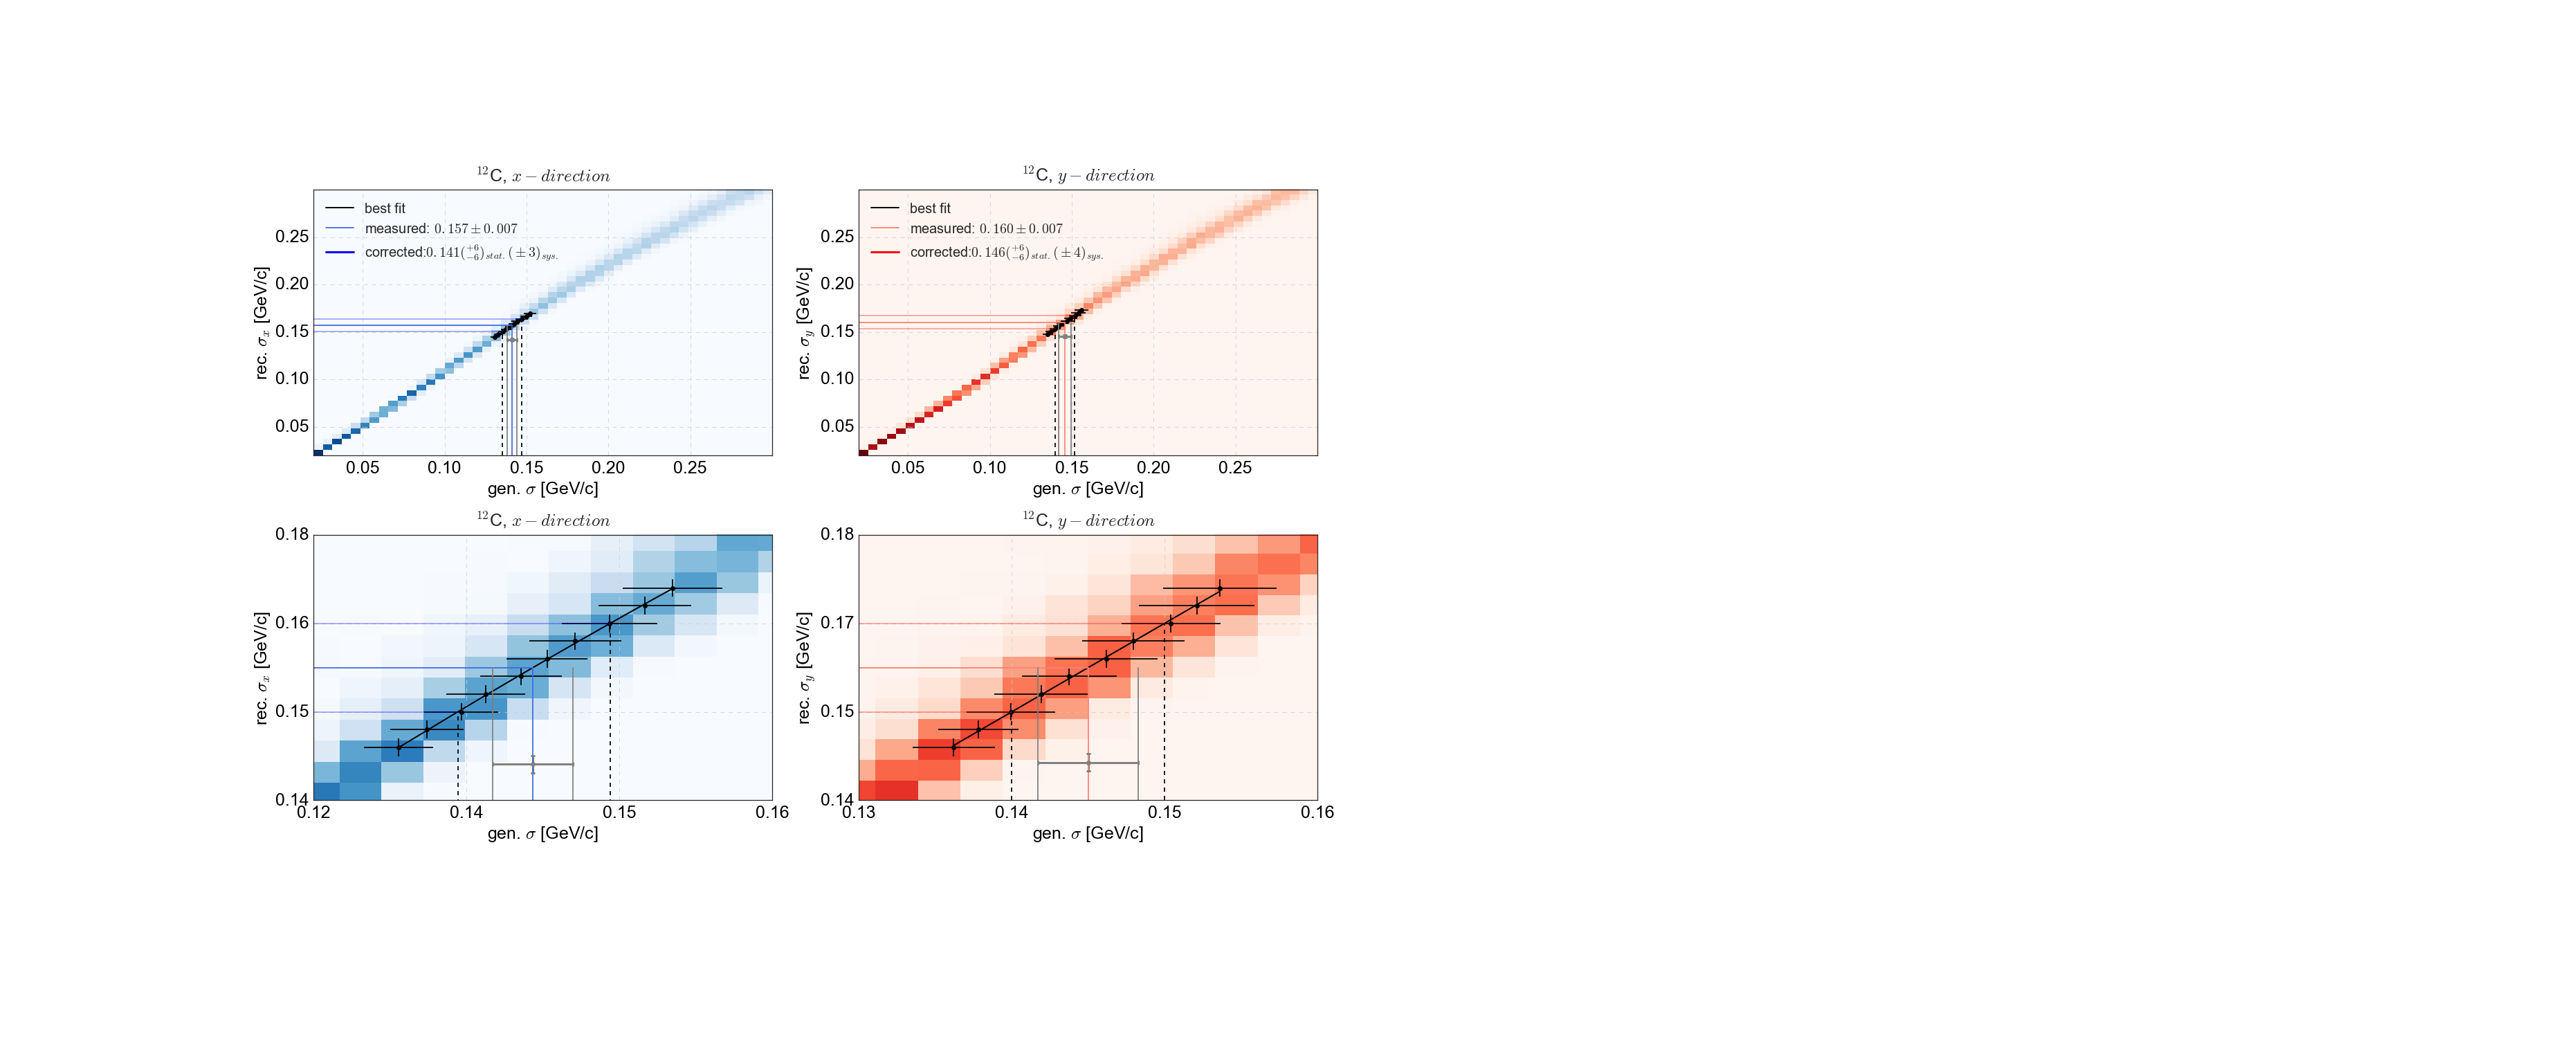

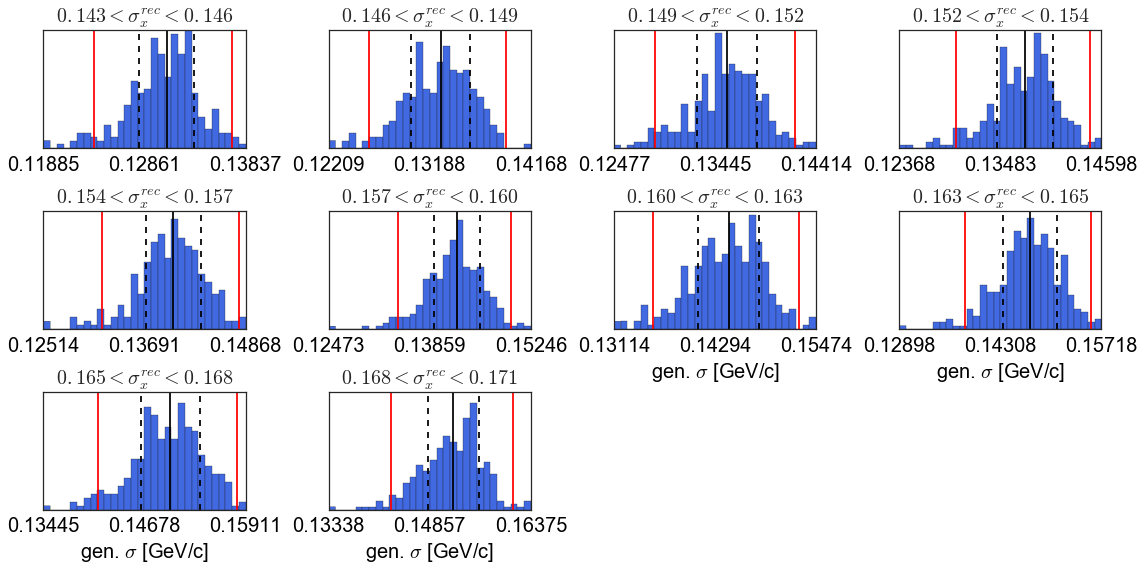

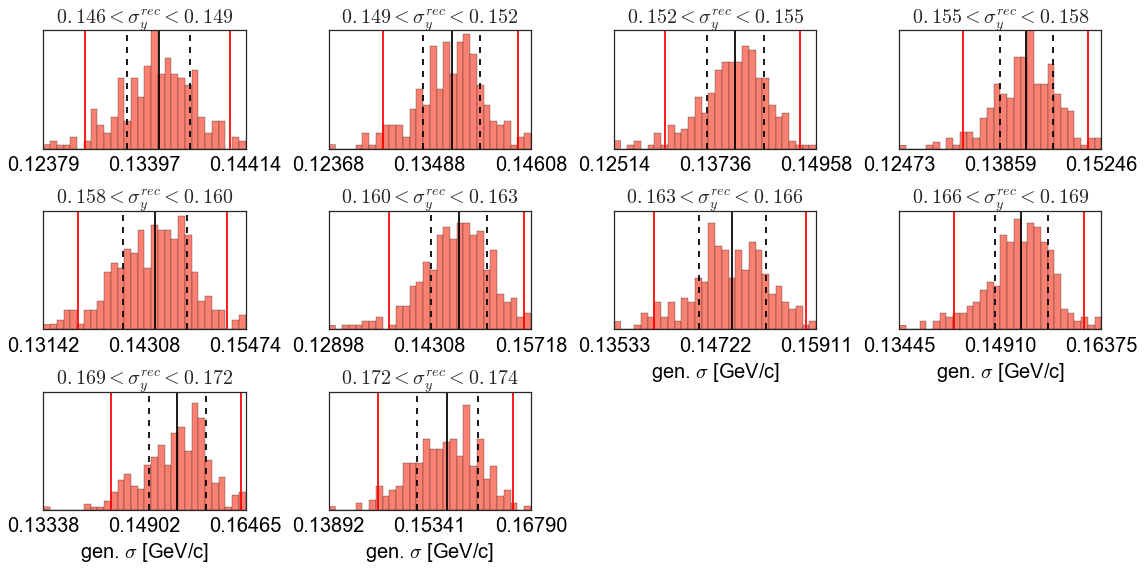

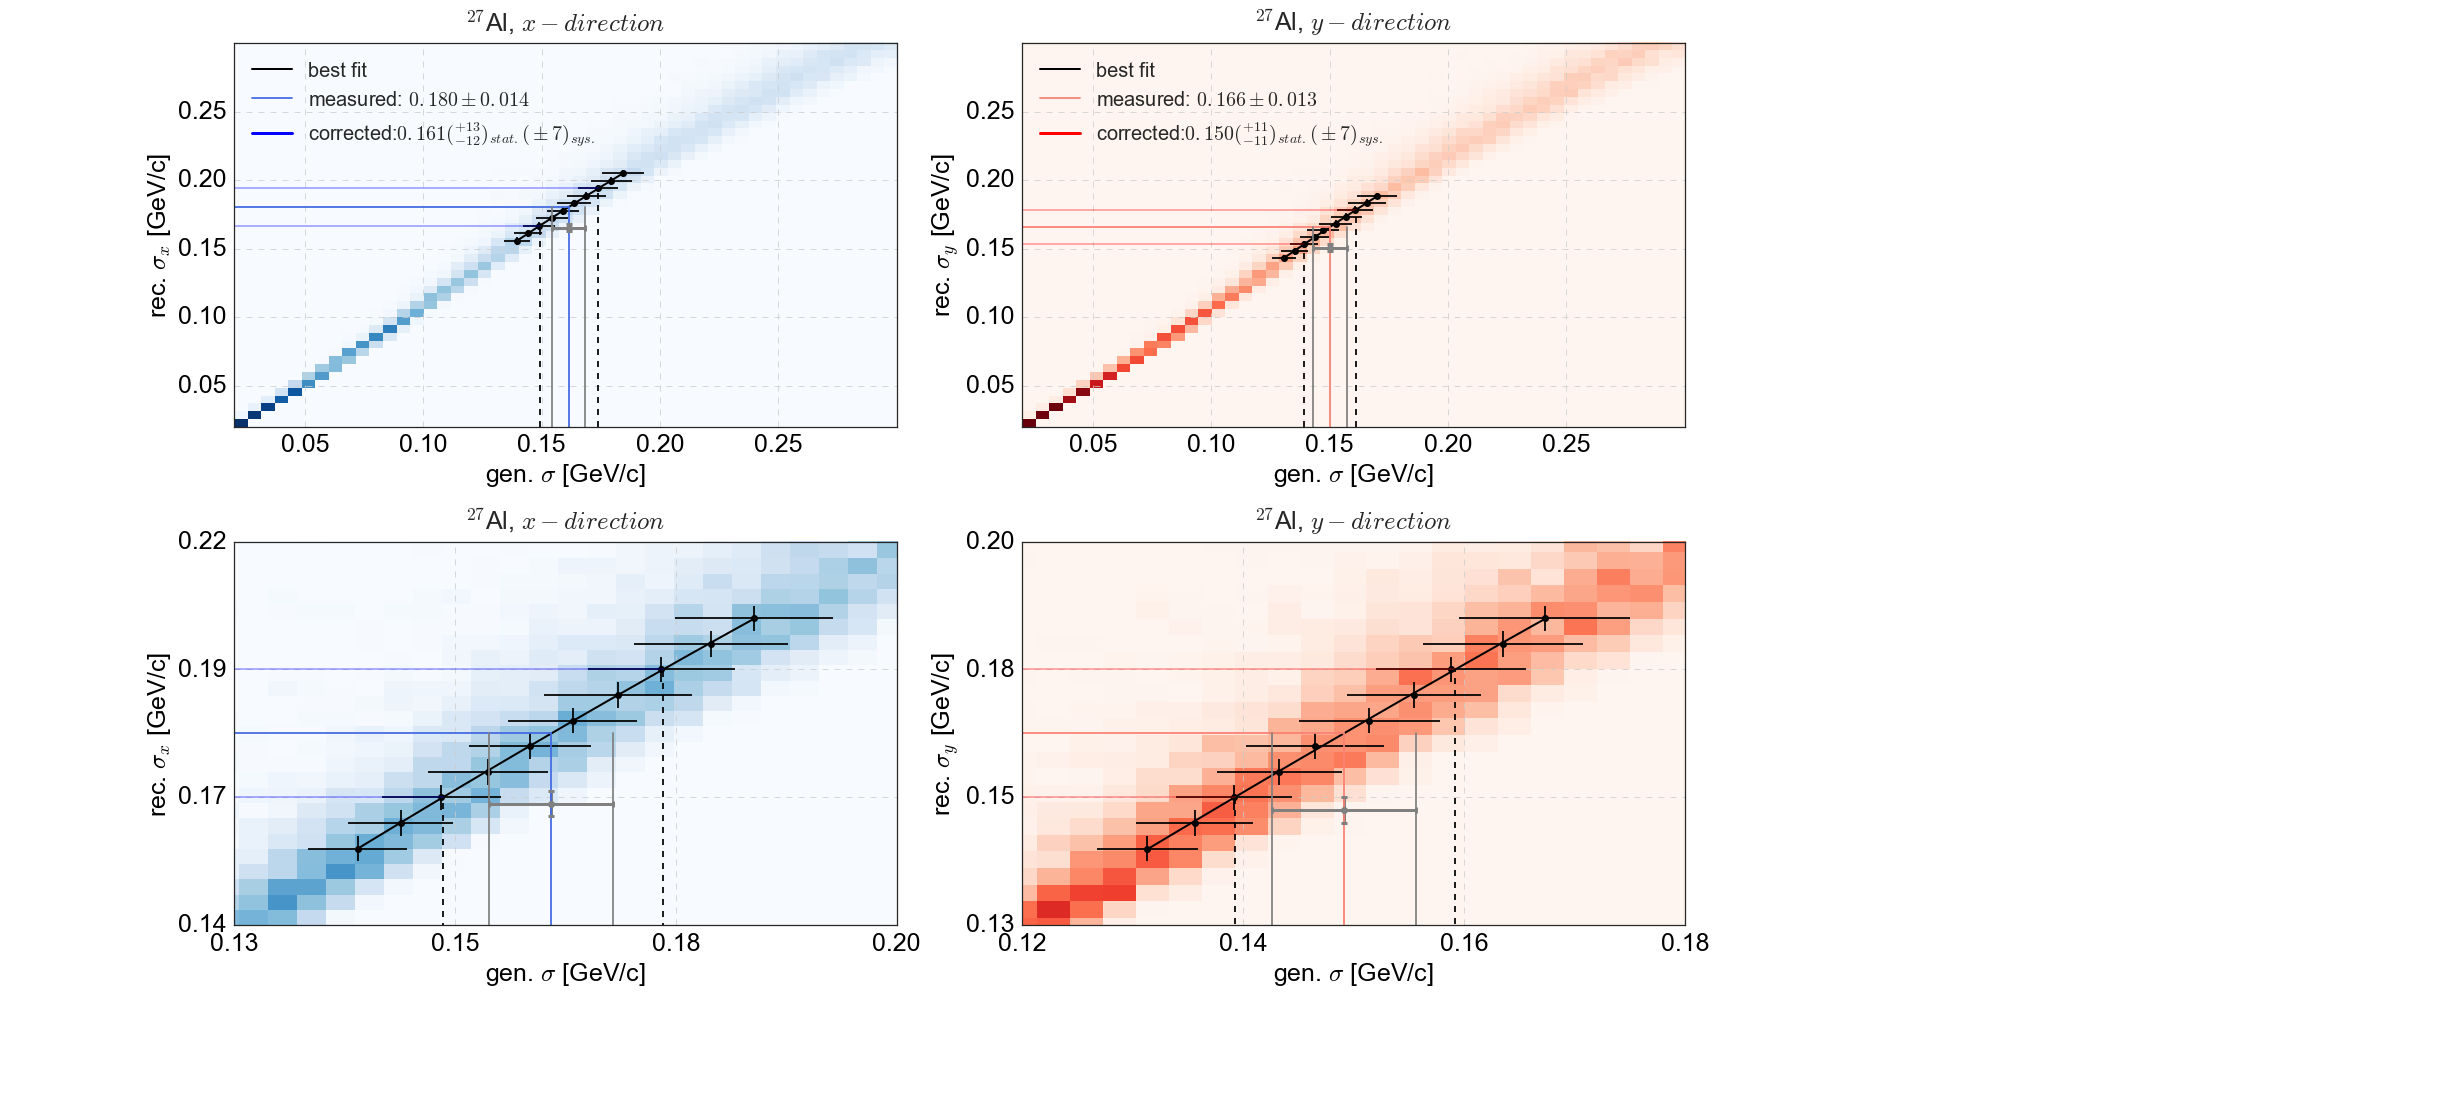

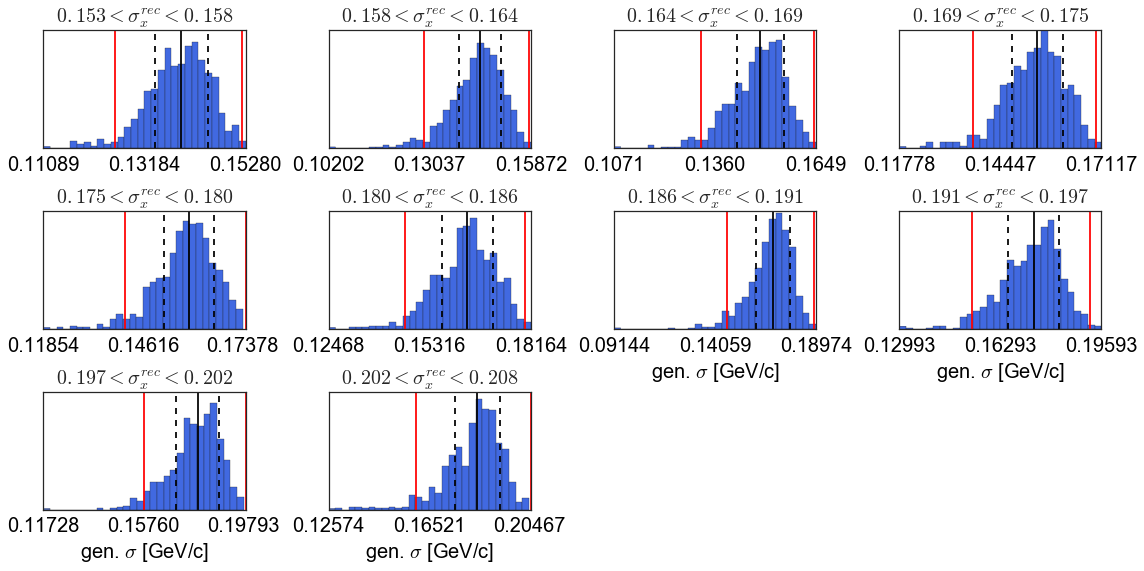

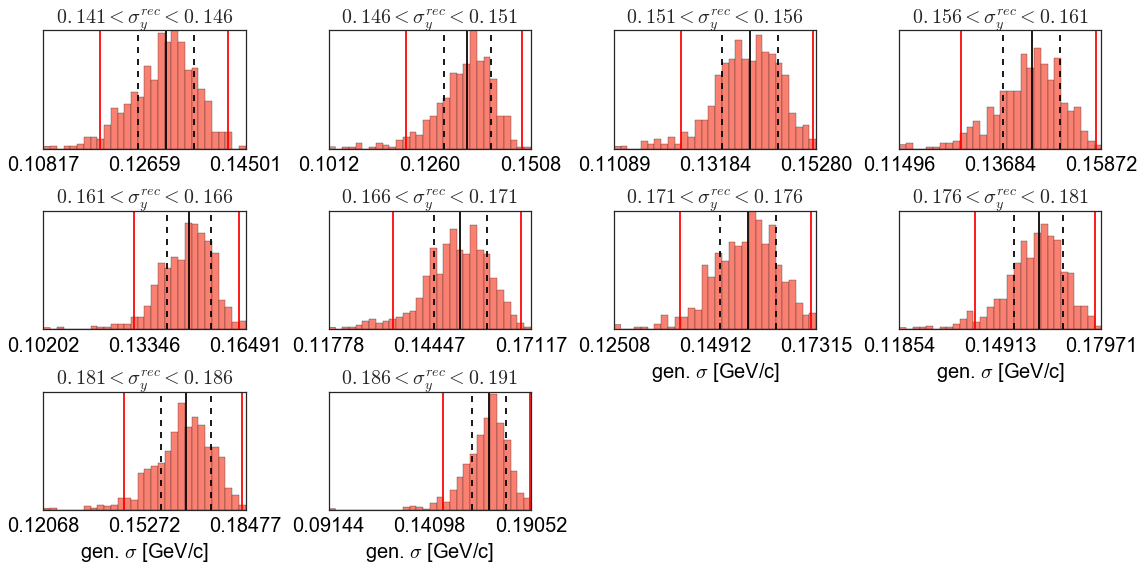

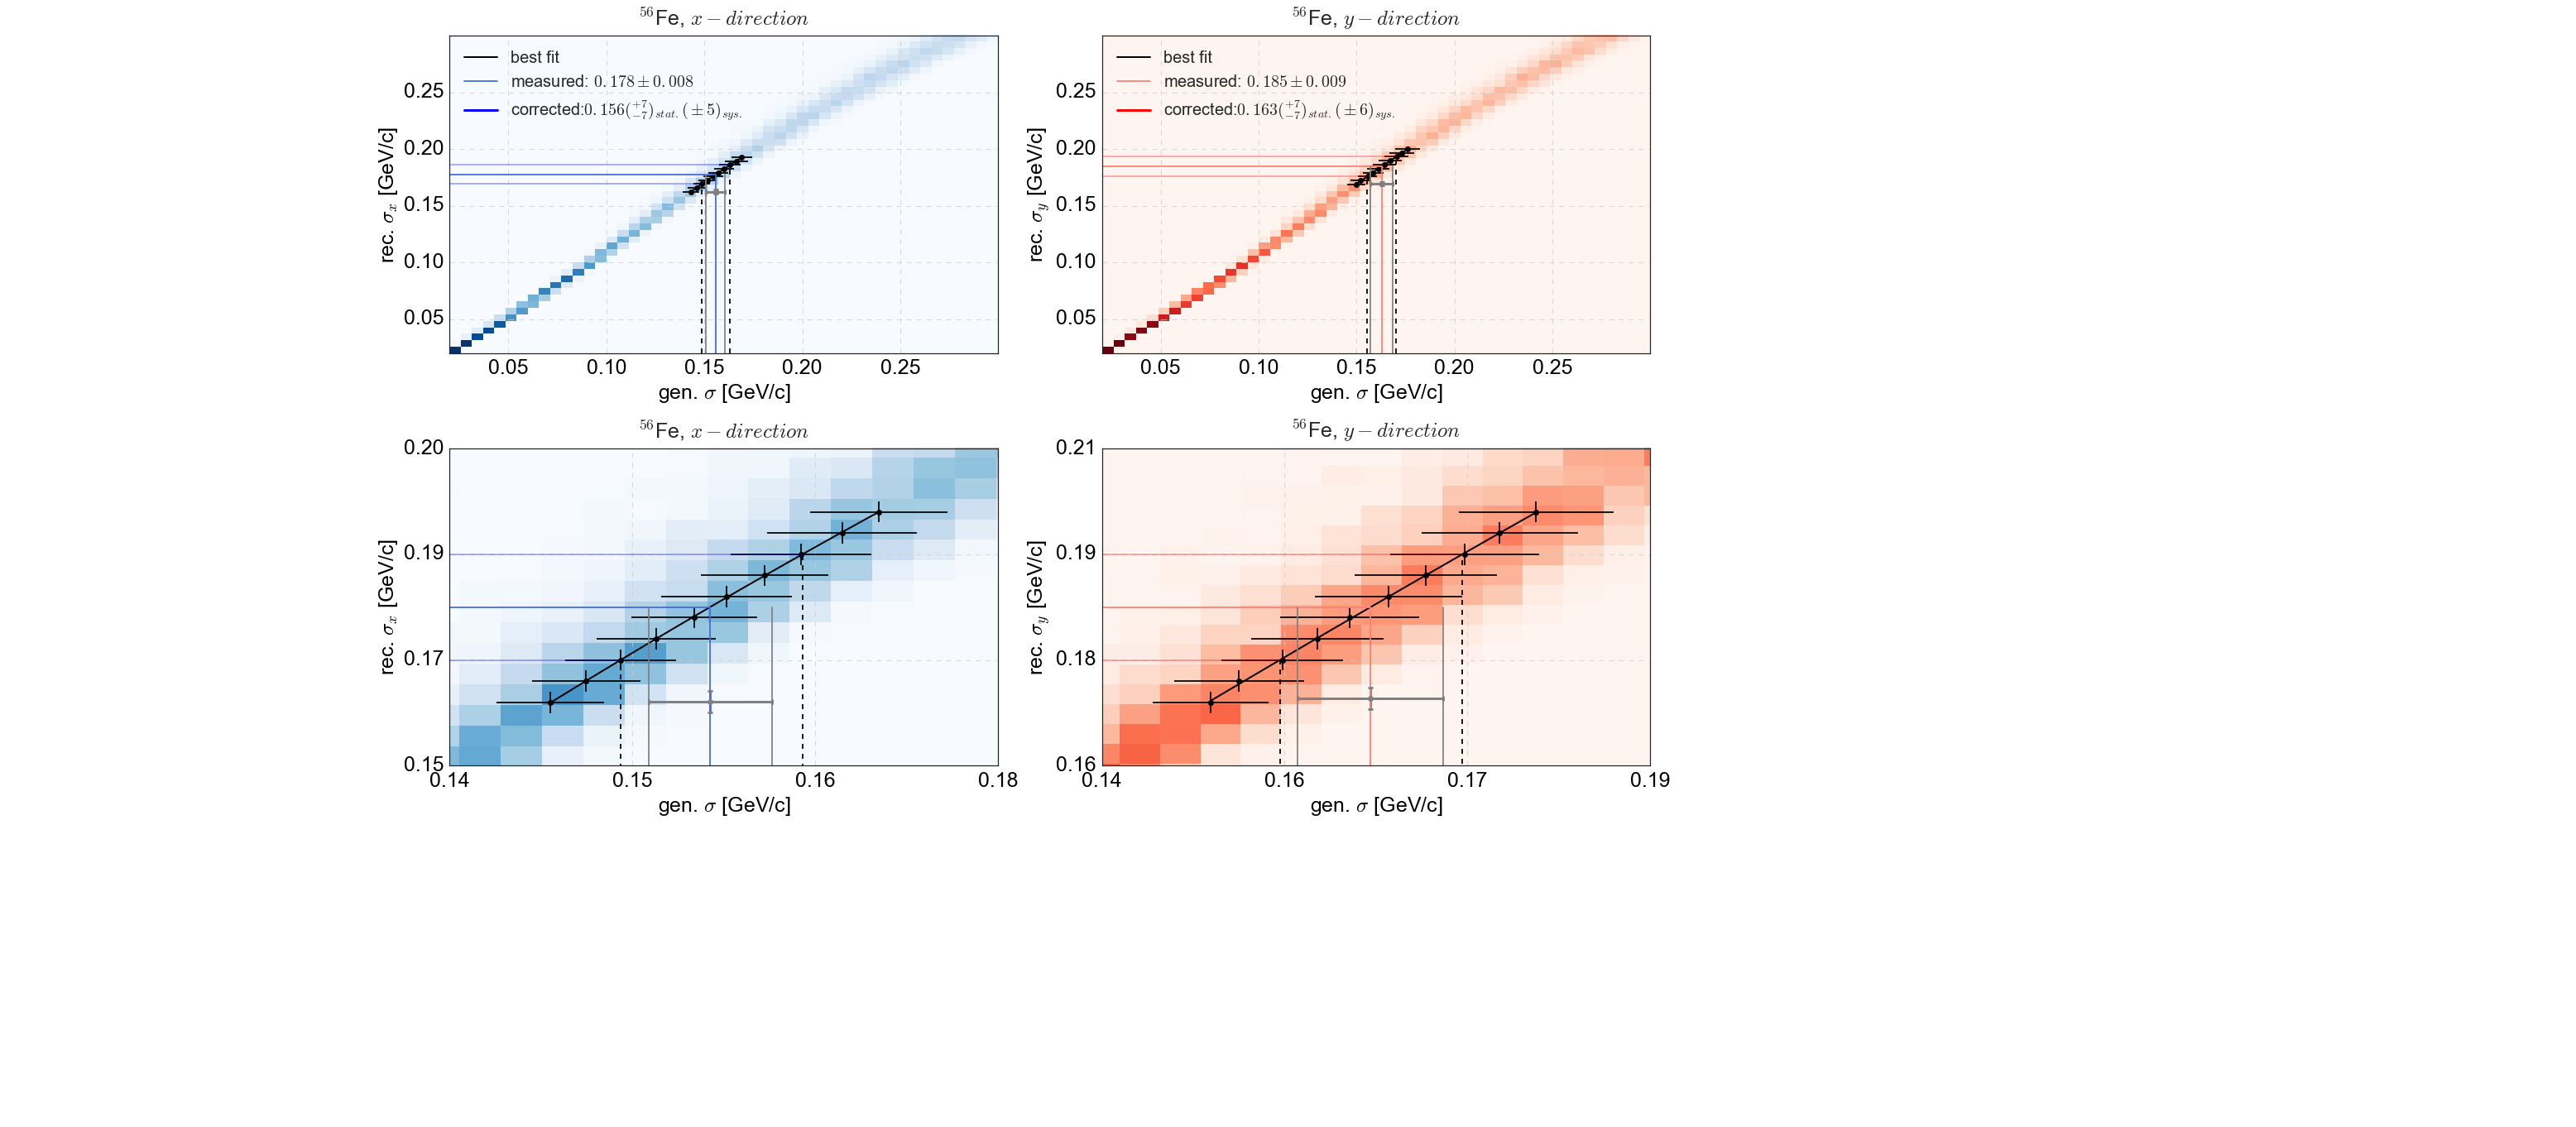

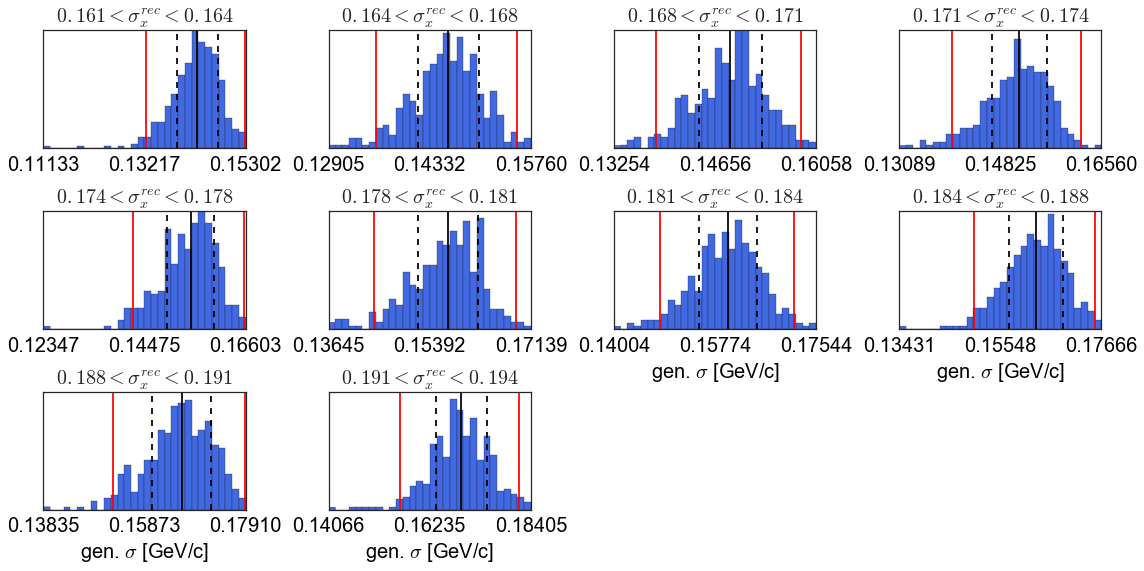

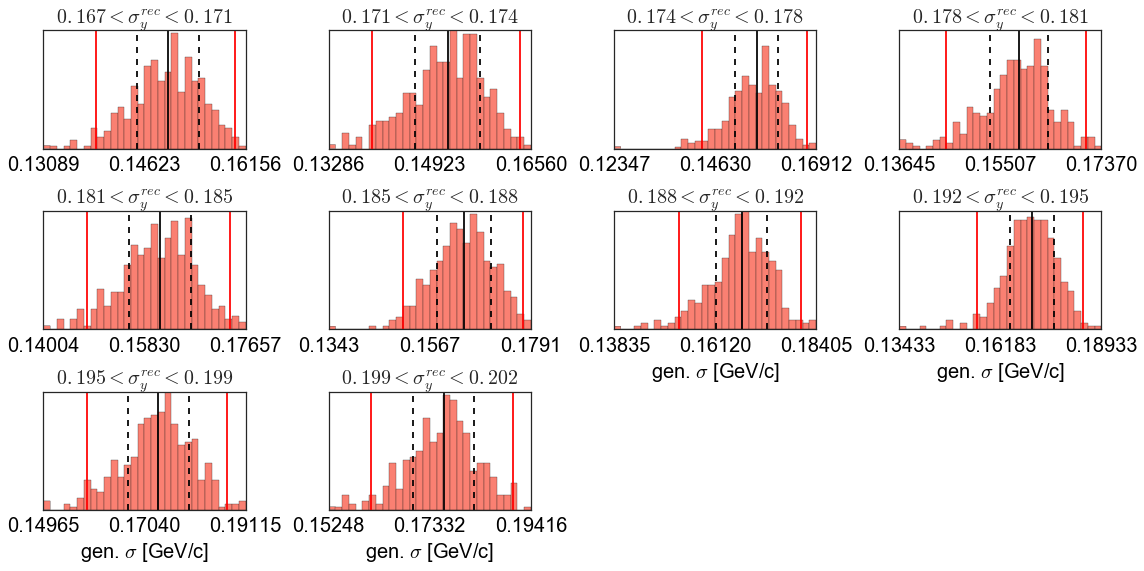

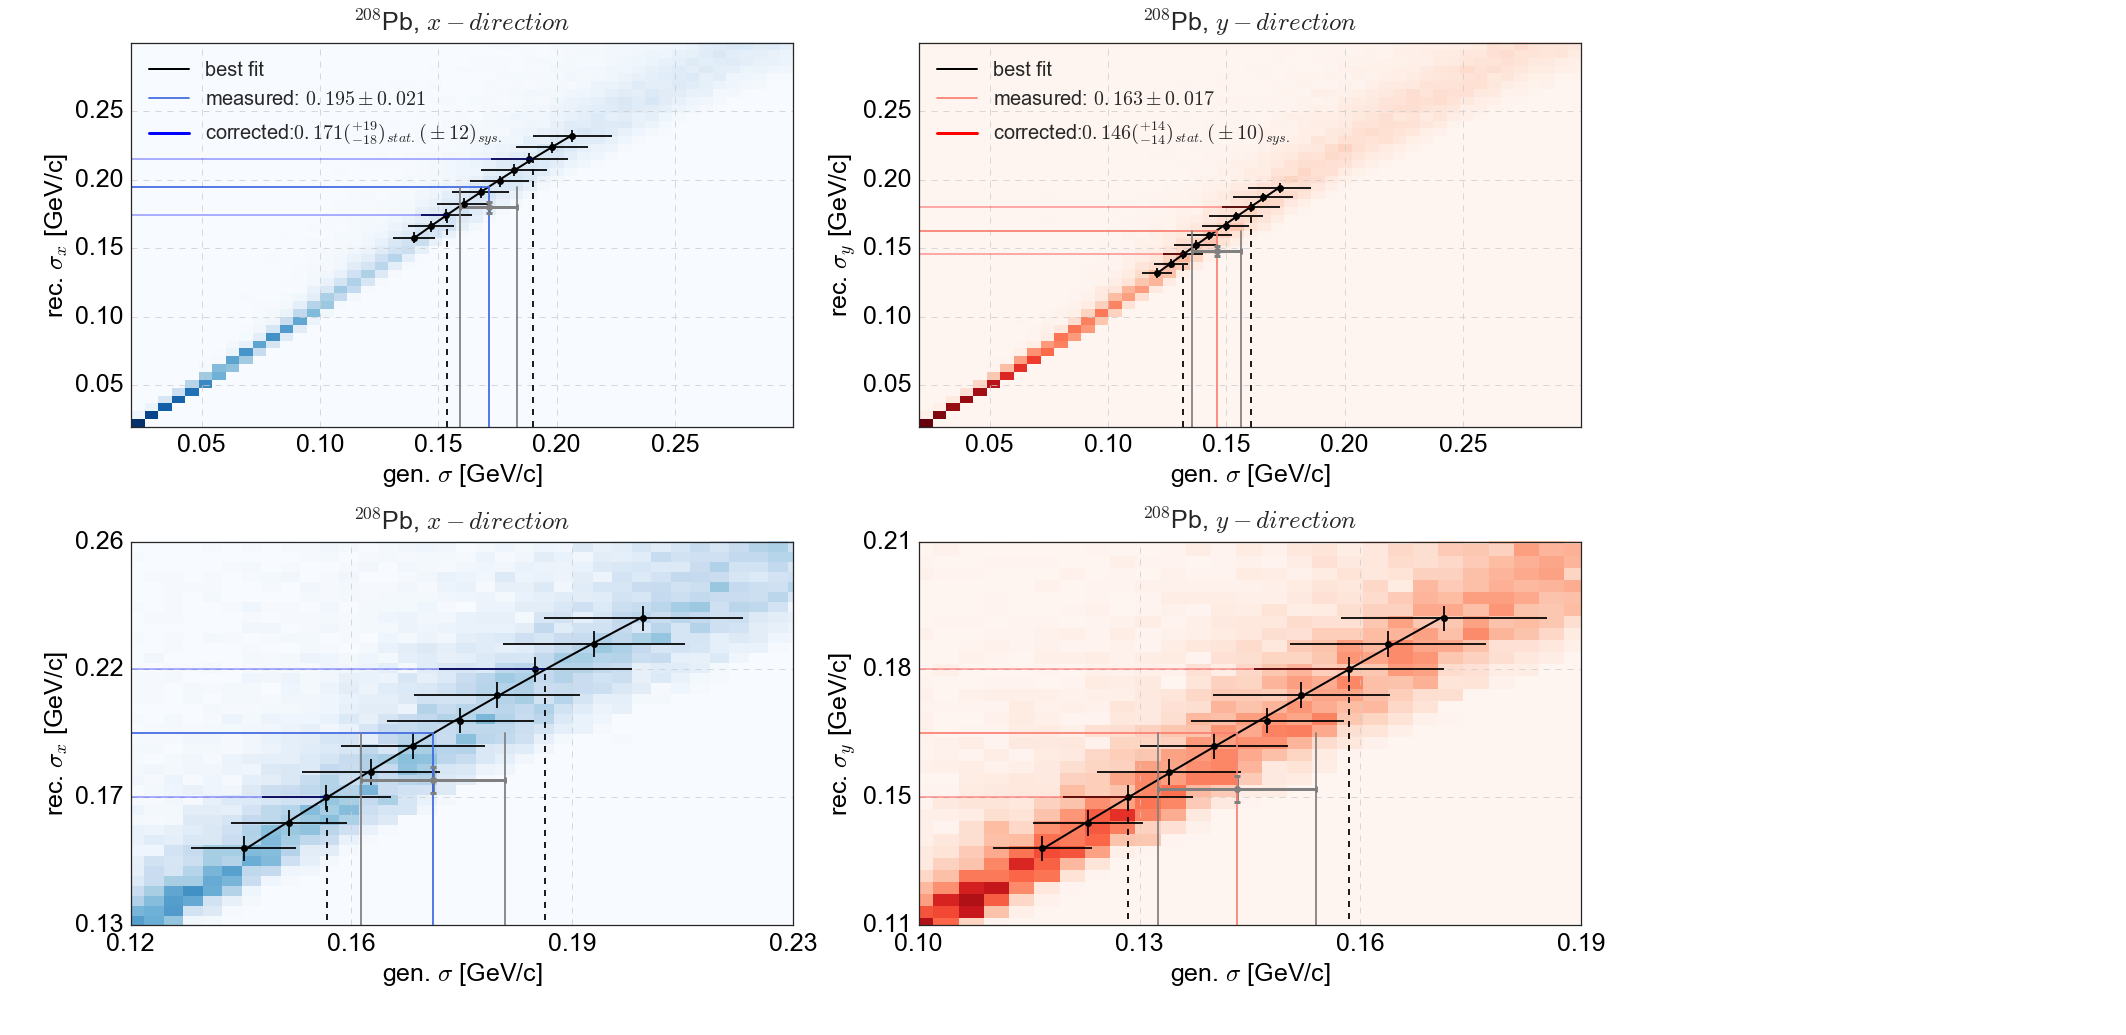

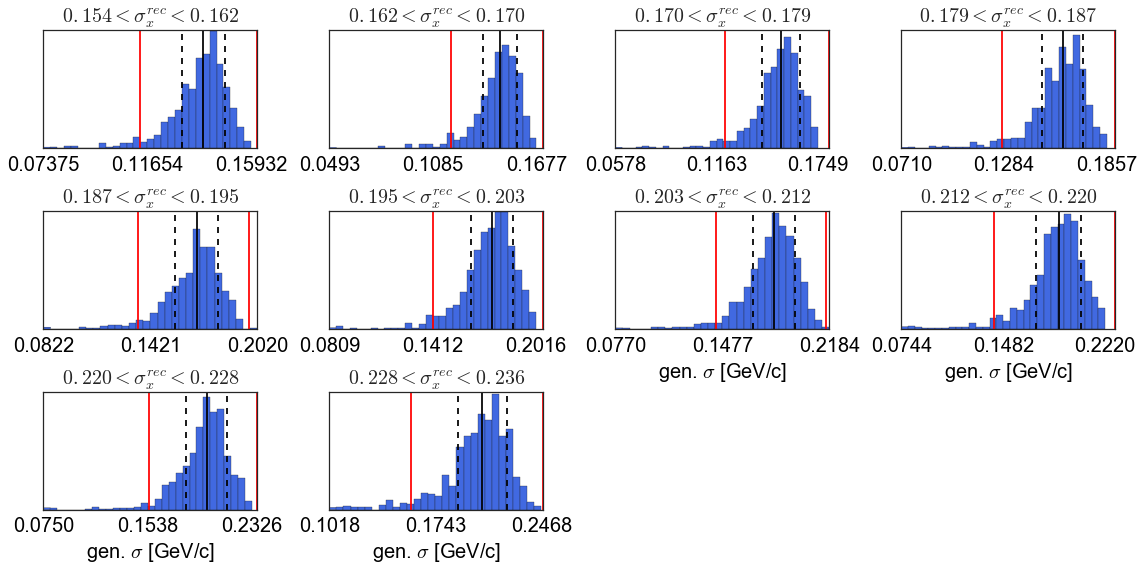

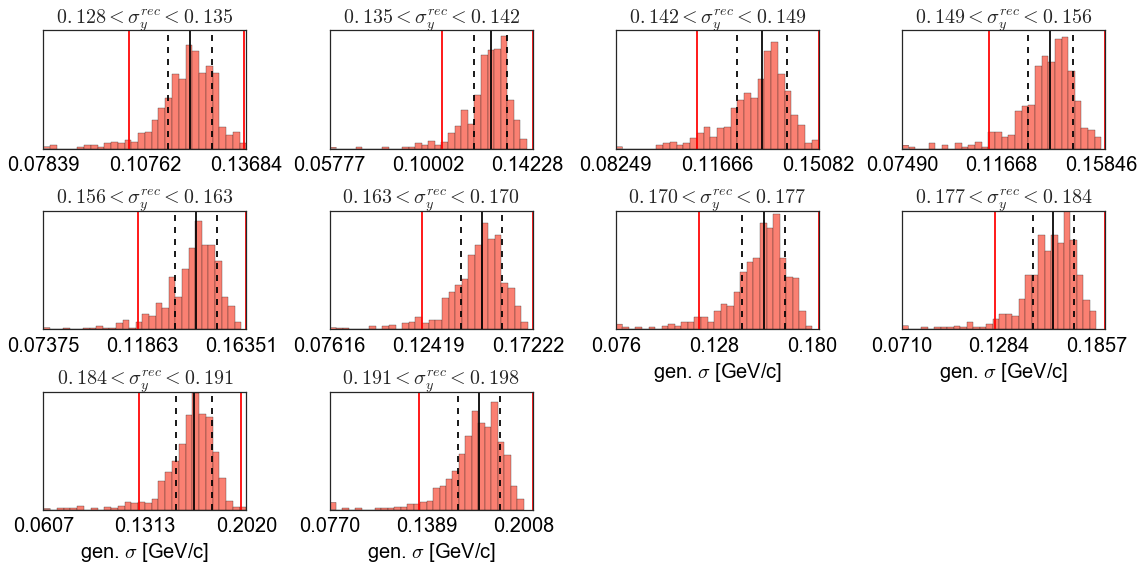

In [10]:
poly_degree = 2 # fit polynomial degree
extraname=''
for i,(A,target) in enumerate(zip(As[0:],targets[0:])):
#     test_name = "ModifiedNrand_"+target
    test_name = "simulations_"+target  
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    fig=plt.figure(figsize=(22,14))
    ax=fig.add_subplot(2,2,1)    
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0,do_add_1Ddist_in_slices=True)
    ax=fig.add_subplot(2,2,3)    
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

    ax=fig.add_subplot(2,2,2)
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree if A!=12 else 1
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0,do_add_1Ddist_in_slices=True)
    ax=fig.add_subplot(2,2,4)
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree if A!=12 else 1
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

    fig.subplots_adjust(bottom=-0.5,left=-0.2)
    fig.tight_layout() 
    filename = figures_path+'St_gen_rec_'+target+'.png' if extraname=='' else figures_path+'St_gen_rec_'+target+'_'+extraname+'.png'    
    fig.savefig( filename )

In [11]:
def compute_sys_uncertainty(sims=None
                             ,Fiducials='PrecFiducials',extraname=""                              
                             ,A=12
                             ,direction='x'
                             ,Nbins_st_rec=10 # GeV/c
                             ,debug=0):
    '''
    return:
            bin width (in \sigma_rec)
            systematical uncertainty
    '''
    
    # measured \sigma_t (DATA)
    cm_pars = cm_parameters[Fiducials]        
    cm_tgt = cm_pars[cm_pars['A']==A]
    sigma_meas = float(cm_tgt['sigma_'+direction+'_before_acc_corr'])
    sigma_meas_err = float(cm_tgt['sigma_'+direction+'_before_acc_corr_err'])

    # region of interest: 2$\sigma$ around measured value
    roi_min = sigma_meas - 2*sigma_meas_err
    roi_max = sigma_meas + 2*sigma_meas_err
    roi_width = roi_max - roi_min
    # create bins in region of interest
    roi_sims = sims[(sims['rec_sigma_'+direction]>roi_min)&(sims['rec_sigma_'+direction]<roi_max)]    

    bin_st_rec_width = roi_width/Nbins_st_rec
    sims_bin_meas = roi_sims[(roi_sims['rec_sigma_'+direction]>(sigma_meas - 0.5*bin_st_rec_width))
                             &(roi_sims['rec_sigma_'+direction]<(sigma_meas + 0.5*bin_st_rec_width))]        
    bin_st_gen_mean = np.mean(sims_bin_meas['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas['gen_Sigma_t'])
    # -->
    sims_bin_meas_trimmed = sims_bin_meas[(sims_bin_meas['gen_Sigma_t']>bin_st_gen_mean-2*bin_st_gen_std)                                  
                                          &(sims_bin_meas['gen_Sigma_t']<bin_st_gen_mean+2*bin_st_gen_std)]
    bin_st_gen_mean = np.mean(sims_bin_meas_trimmed['gen_Sigma_t'])
    bin_st_gen_std = np.std(sims_bin_meas_trimmed['gen_Sigma_t'])
    corr_val_err_sys = bin_st_gen_std 
    
    return bin_st_rec_width , corr_val_err_sys

target: C
target: Al
target: Fe
target: Pb


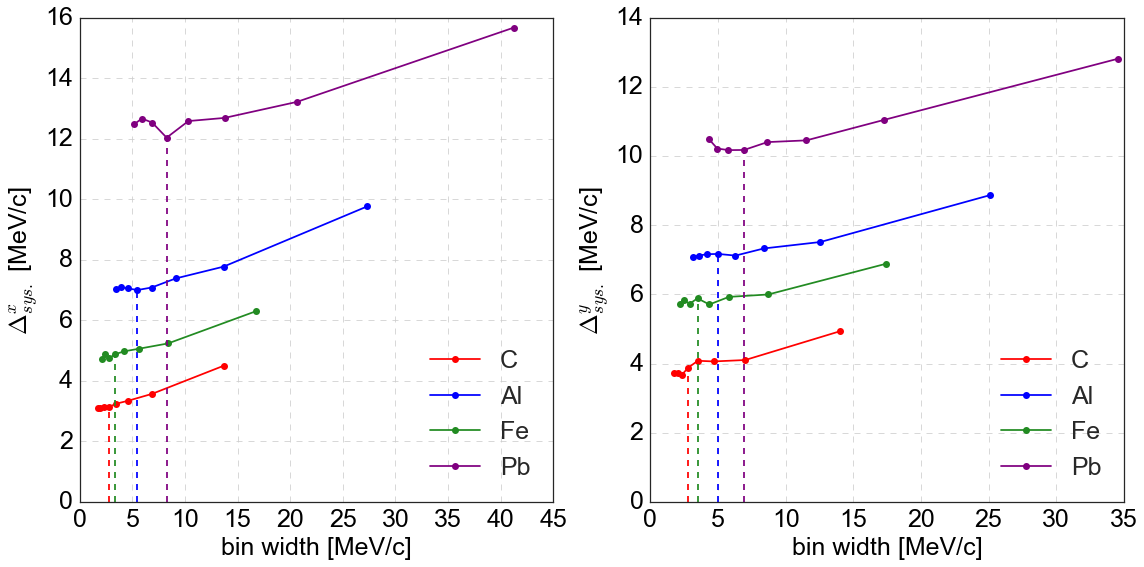

In [12]:
bin_width_x = dict()
sys_unc_x = dict()

bin_width_y = dict()
sys_unc_y = dict()

fig = plt.figure(figsize=(16,8))

for i,(A,target,color) in enumerate(zip(As[0:],targets[0:],colors[0:])):
    print 'target:',target
#     test_name = "ModifiedNrand_"+target
    test_name = "simulations_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]

    bin_width_x[target] = []
    sys_unc_x[target] = []
    bin_width_y[target] = []
    sys_unc_y[target] = []

    for Nbins_st_rec in [2,4,6,8,10,12,14,16]:
        bin_st_rec_width_x , corr_val_err_sys_x = compute_sys_uncertainty(sims=good_results
                                                                          ,A=A,direction='x',debug=0
                                                                          ,Nbins_st_rec=Nbins_st_rec)
        bin_width_x[target].append(bin_st_rec_width_x)
        sys_unc_x[target].append(corr_val_err_sys_x)
        
        bin_st_rec_width_y , corr_val_err_sys_y = compute_sys_uncertainty(sims=good_results
                                                                          ,A=A,direction='y',debug=0
                                                                          ,Nbins_st_rec=Nbins_st_rec)
        bin_width_y[target].append(bin_st_rec_width_y)
        sys_unc_y[target].append(corr_val_err_sys_y)
        
        if Nbins_st_rec==10:
            ax = fig.add_subplot(1,2,1)
            ax.plot([1000*bin_st_rec_width_x,1000*bin_st_rec_width_x],[0,1000*corr_val_err_sys_x],'--',color=color)
            ax = fig.add_subplot(1,2,2)
            ax.plot([1000*bin_st_rec_width_y,1000*bin_st_rec_width_y],[0,1000*corr_val_err_sys_y],'--',color=color)


        
    ax = fig.add_subplot(1,2,1)
    ax.plot(1000*np.array(bin_width_x[target]),1000*np.array(sys_unc_x[target]),'-o',label=target,color=color)
    ax = fig.add_subplot(1,2,2)
    ax.plot(1000*np.array(bin_width_y[target]),1000*np.array(sys_unc_y[target]),'-o',label=target,color=color)

ax = fig.add_subplot(1,2,1)
set_axes(ax,'bin width [MeV/c]',r'$\Delta_{sys.}^{x}$ [MeV/c]',do_add_legend=True,do_add_grid=True)
ax = fig.add_subplot(1,2,2)
set_axes(ax,'bin width [MeV/c]',r'$\Delta_{sys.}^{y}$ [MeV/c]',do_add_legend=True,do_add_grid=True)

plt.tight_layout()
plt.savefig(figures_path + 'Delta_sys_vs_bin_width.pdf')

# Compute the final $\sigma_t$

In [13]:
sample = cm_parameters_with_correction['PrecFiducials']
extraname = ''

for direction in ['x','y']:
    sample['sigma_'+direction+extraname+'_final'] = sample['sigma_'+direction+'_corrected'+extraname]
    for updw in ['up','dw']:
        sample['sigma_'+direction+extraname+'_final_'+updw+'_err'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot'+extraname]

corr_x = sample['sigma_x_corrected'+extraname]
Dcorr_x = sample['sigma_x_corrected_err_tot'+extraname]

corr_y = sample['sigma_y_corrected'+extraname]
Dcorr_y = sample['sigma_y_corrected_err_tot'+extraname]

# weighted average
corr_t = (corr_x/np.square(Dcorr_x)+corr_y/np.square(Dcorr_y))/( 1./np.square(Dcorr_x) + 1./np.square(Dcorr_y))
sample['sigma_t'+extraname+'_final'] = corr_t
    
Dsys_x = sample['sigma_x_corrected_err_sys'+extraname]
Dsys_y = sample['sigma_y_corrected_err_sys'+extraname]
Dsys_t = 0.5*( Dsys_x + Dsys_y )
# Dsys_t = np.sqrt(1./( 1./np.square(Dsys_x) + 1./np.square(Dsys_y) ))
sample['sigma_t'+extraname+'_final_err_sys'] = Dsys_t


for updw in ['up','dw']:            
    Dstat_x = sample['sigma_x_corrected_'+updw+'_err_stat'+extraname]
    Dstat_y = sample['sigma_y_corrected_'+updw+'_err_stat'+extraname]
    #     Dstat_t = 0.5*np.sqrt( np.square(Dstat_x) + np.square(Dstat_y) )
    Dstat_t = np.sqrt(1./( 1./np.square(Dstat_x) + 1./np.square(Dstat_y) ))
    sample['sigma_t'+extraname+'_final_'+updw+'_err_stat'] = Dstat_t

    Dtot_t = np.sqrt( np.square(Dstat_t) + np.square(Dsys_t) )
    sample['sigma_t'+extraname+'_final_'+updw+'_err_tot'] = Dtot_t
    sample['sigma_t'+extraname+'_final_'+updw+'_err'] = Dtot_t


sample['sigma_t_final'] = corr_t
sample['sigma_t_final_err_sys'] = sample['sigma_t_final_err_sys']

In [14]:
cm_parameters_with_correction['PrecFiducials'][['sigma_t_before_acc_corr','sigma_t_before_acc_corr_err'
                                                ,'sigma_t_final'
                                                ,'sigma_t_final_up_err','sigma_t_final_dw_err']].astype(float)

,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_up_err,sigma_t_final_dw_err
0,0.158720,0.004904,0.143369,0.005483,0.005437
1,0.172366,0.009252,0.155232,0.010926,0.010782
2,0.180959,0.006040,0.158981,0.007501,0.007416
3,0.176265,0.013257,0.155834,0.015952,0.015653


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


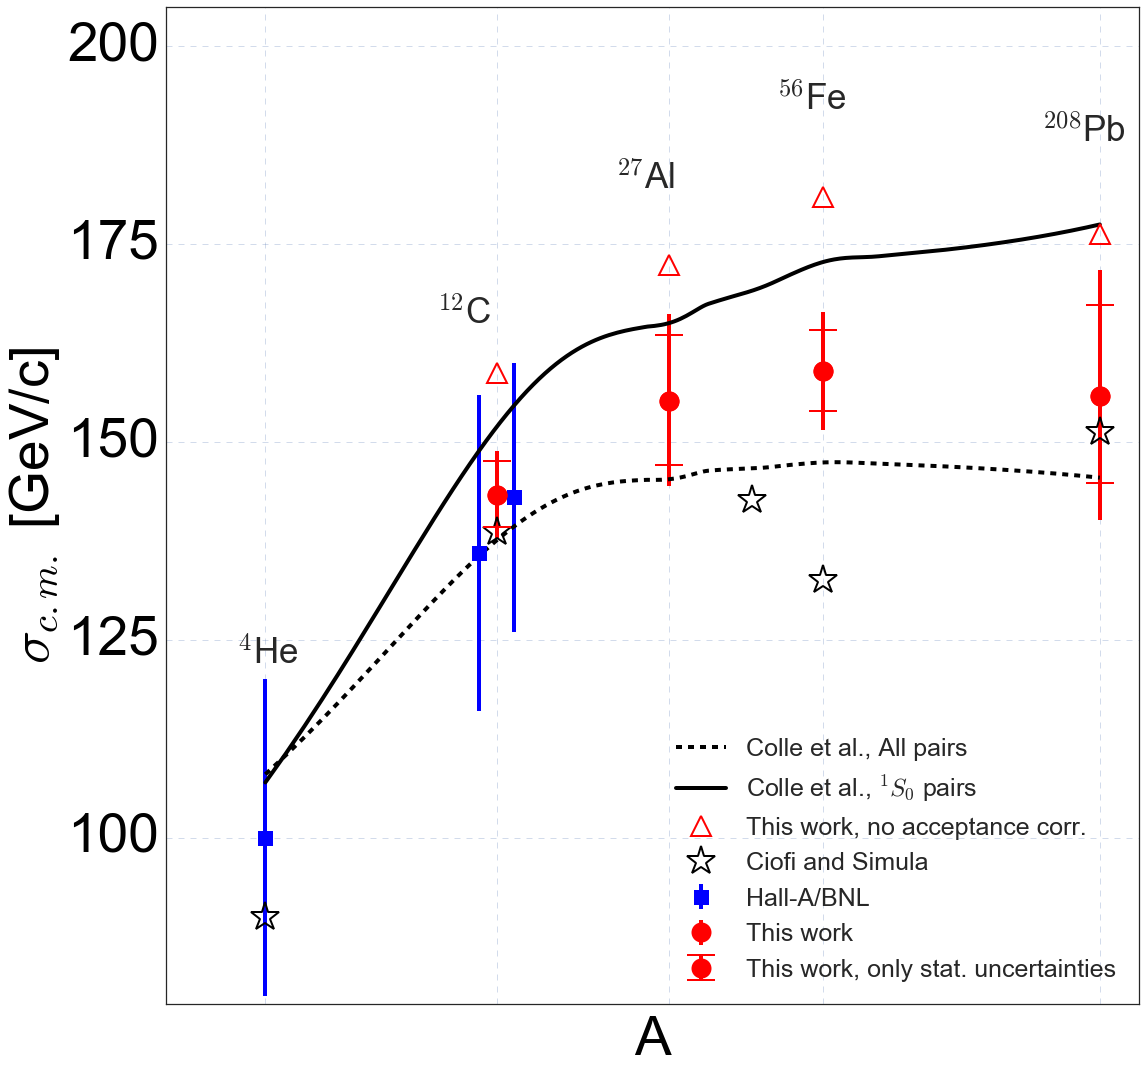

In [15]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)

plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'],direction='t',ax=ax, label="This work" , marker='o', markersize=20 )
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'] ,direction='t', unc_name='stat' , ax=ax, label="This work, only stat. uncertainties" , marker='o', markersize=20 , capthick=2 , capsize=14)

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results.pdf')    

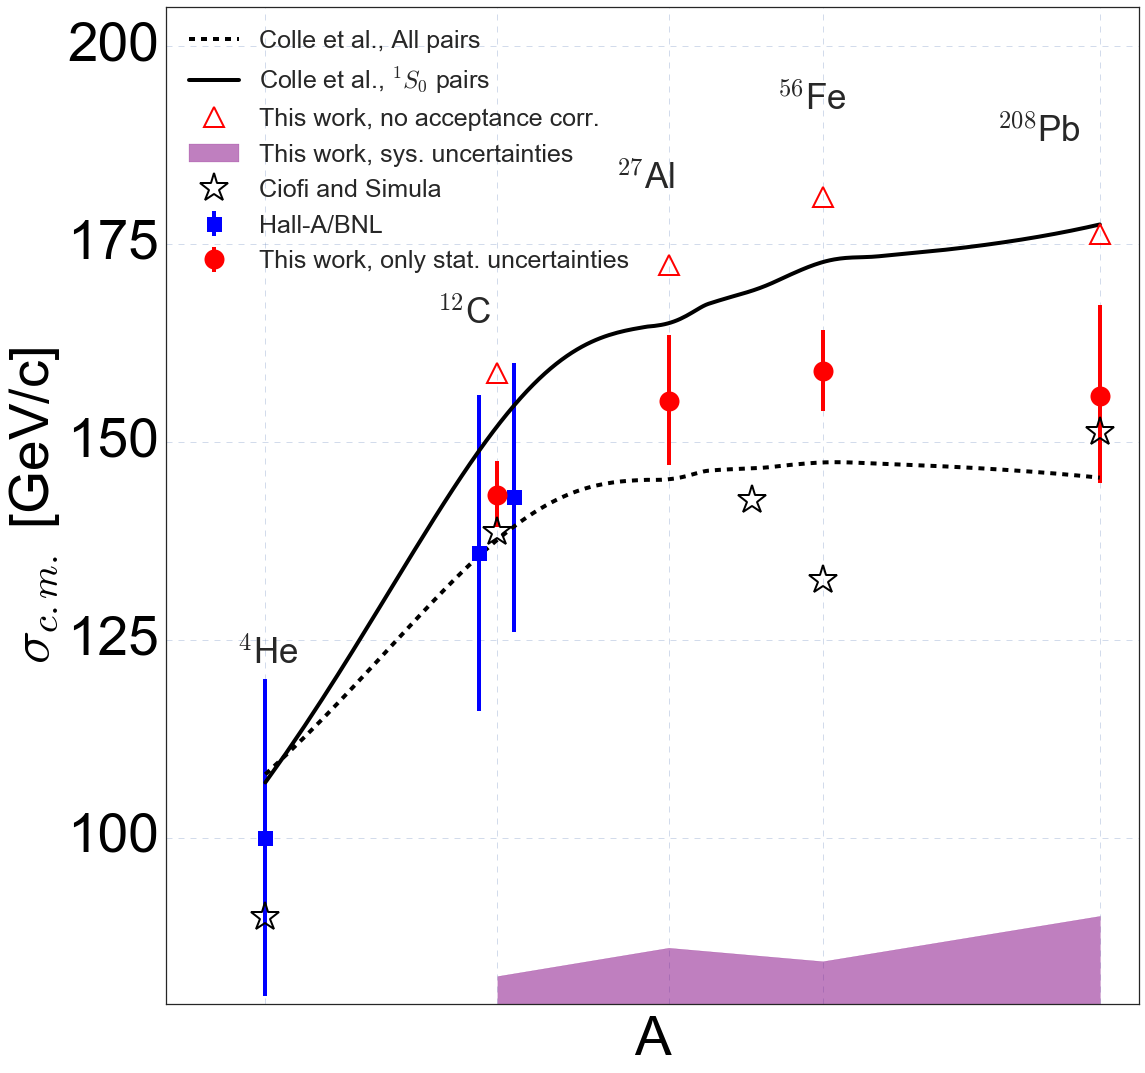

In [16]:
# separate sys. unc. as a band along the abscissa
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(128,188), }),do_Ciofi=True)
data=cm_parameters_with_correction['PrecFiducials']
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'] ,direction='t', unc_name='stat' , ax=ax, label="This work, only stat. uncertainties" , marker='o', markersize=20 )
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')

# add a band of systematical uncertaintes
ax.fill_between(cm_pars['A']
                , np.min(ax.get_ylim()), np.min(ax.get_ylim()) + 1000*data['sigma_t_final_err_sys'] 
                , color='purple' , alpha=0.5 ,  label='This work, sys. uncertainties')

ax.legend(fontsize=25,loc='upper left')
plt.tight_layout()
plt.savefig(figures_path+'results_sys_band.pdf')    

# What is the Pvalue for consistency of the points with the "all-pairs" line?

# chi2 comparison of the points to a line:
## $\chi^2_{red} = \frac{1}{N_{points}-1} \sum_i \left(\frac{\left(y_i - f(x_i)\right)^2}{\Delta y_i^2} \right)$
where $f(x_i)$ is the value of the function at point x_i

 chi2/ndf: 3.79839645865 /3


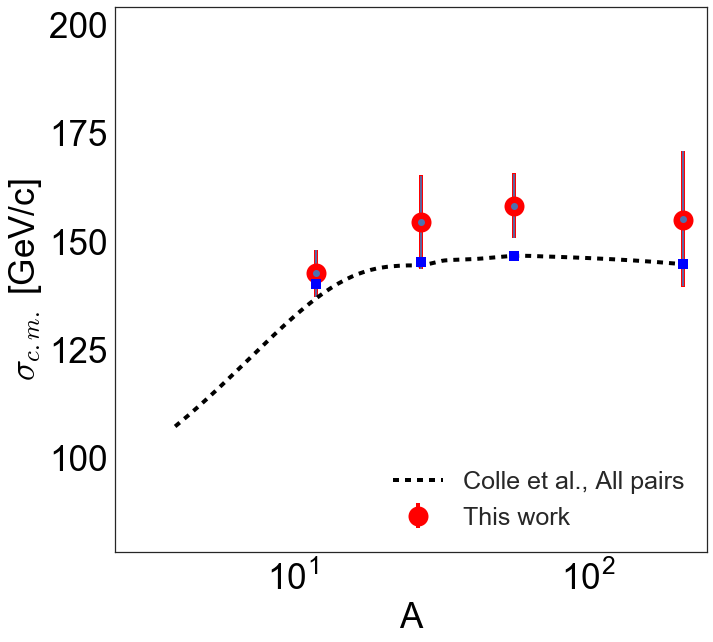

In [63]:
data=cm_parameters_with_correction['PrecFiducials']
fig, ax = plt.subplots(figsize=(10,9))
f_all = plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
plot_data_assymetric( data=data,direction='t',ax=ax, label="This work" , marker='o', markersize=20 )
ax.legend(fontsize=25,loc='lower right')
set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=35 
             ,xticks=[4,12,27,56,208],xlim=(2.5,250)
             ,yticks=[100,125,150,175,200], ylim=(79,205)
        )
ax.set_xscale('log')

x = data['A'] 
y = np.array([143.36 , 155.2 , 159.0 , 156.0 ])
yerr = np.array([5.4 , 10.7 , 7.4 , 15.6])
f_00 = np.array([157,166,173.,177.5])
f_all = np.array([141,146,147.5,145.5])
f = f_all
chi2 = np.sum( np.square(y - f) / np.square(yerr) )
chi2red = chi2/3

plt.errorbar(x,y,yerr,fmt='o')
plt.errorbar(x,f,fmt='s',color='blue',markersize=10)

plt.tight_layout()
print 'chi2/ndf:',chi2,'/3'

# Can we apply a cut on $p_{val}$ of KS-test or $\chi^2$-test to reject unreasonable solutions?

In [21]:
for Fiducials in ["PrecFiducials"]:
    for A,target in zip(As,targets):#{
            test_name = "chi2red_"+target
            simulation_results[test_name] = pd.concat([
                    pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/"+test_name+".csv")
                    ])
            simulation_results[test_name].fillna(-1,inplace=True)
            print len(simulation_results[test_name]),'events in ',test_name            

19200 events in  chi2red_C
18938 events in  chi2red_Al
18900 events in  chi2red_Fe
13097 events in  chi2red_Pb


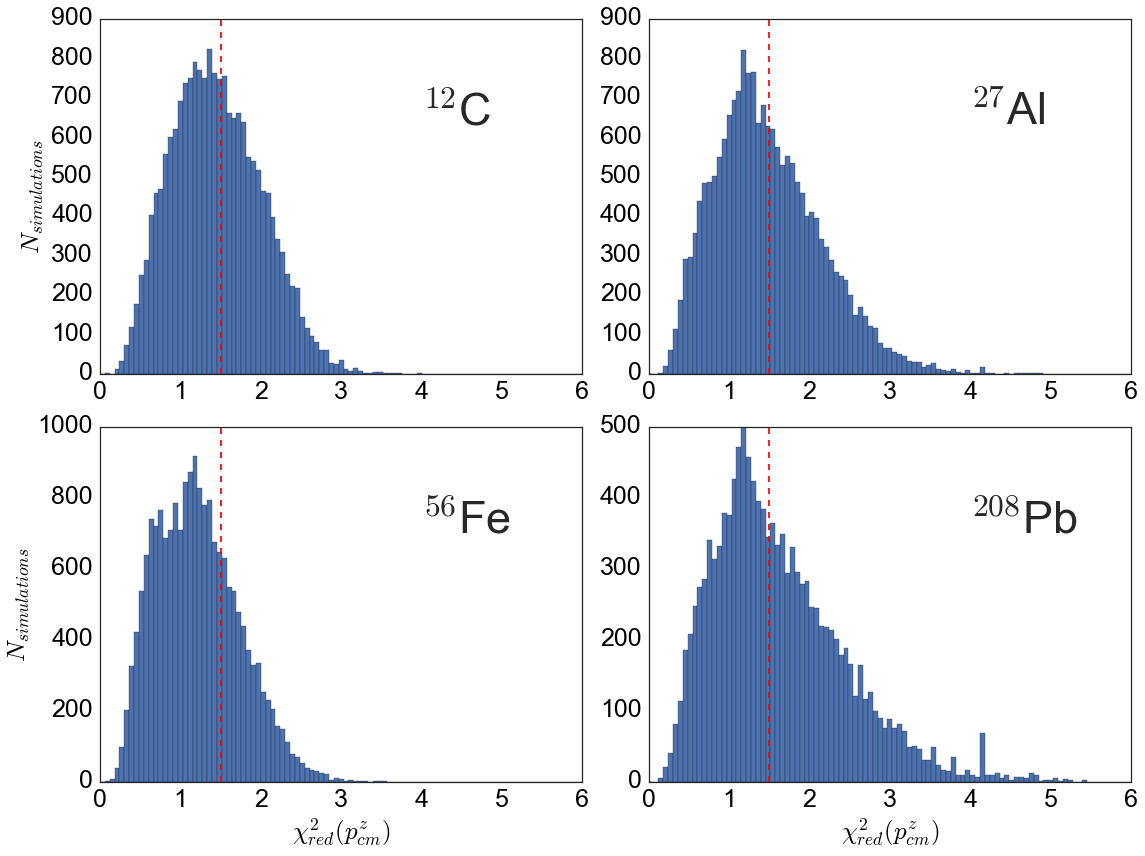

In [22]:
cut_chi2_z = 1.5
fig=plt.figure(figsize=(16,12))
for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    ax=fig.add_subplot(2,2,i+1)    
    plt.hist(good_results['chi2red_data_sim_z'],bins=np.linspace(0,6,100))
    set_axes(ax
             ,x_label=r'$\chi^2_{red}(p_{cm}^{z})$' if i>1 else ''
             ,y_label=r'$N_{simulations}$' if i==0 or i==2 else ''
            )
    plt.plot([cut_chi2_z,cut_chi2_z],ax.get_ylim(),'--',color='red')
    plt.text(4,0.7*np.max(ax.get_ylim()),target_name,fontsize=45)
plt.tight_layout()
plt.savefig(figures_path+'chi2red_data_sim_z'+'.pdf')

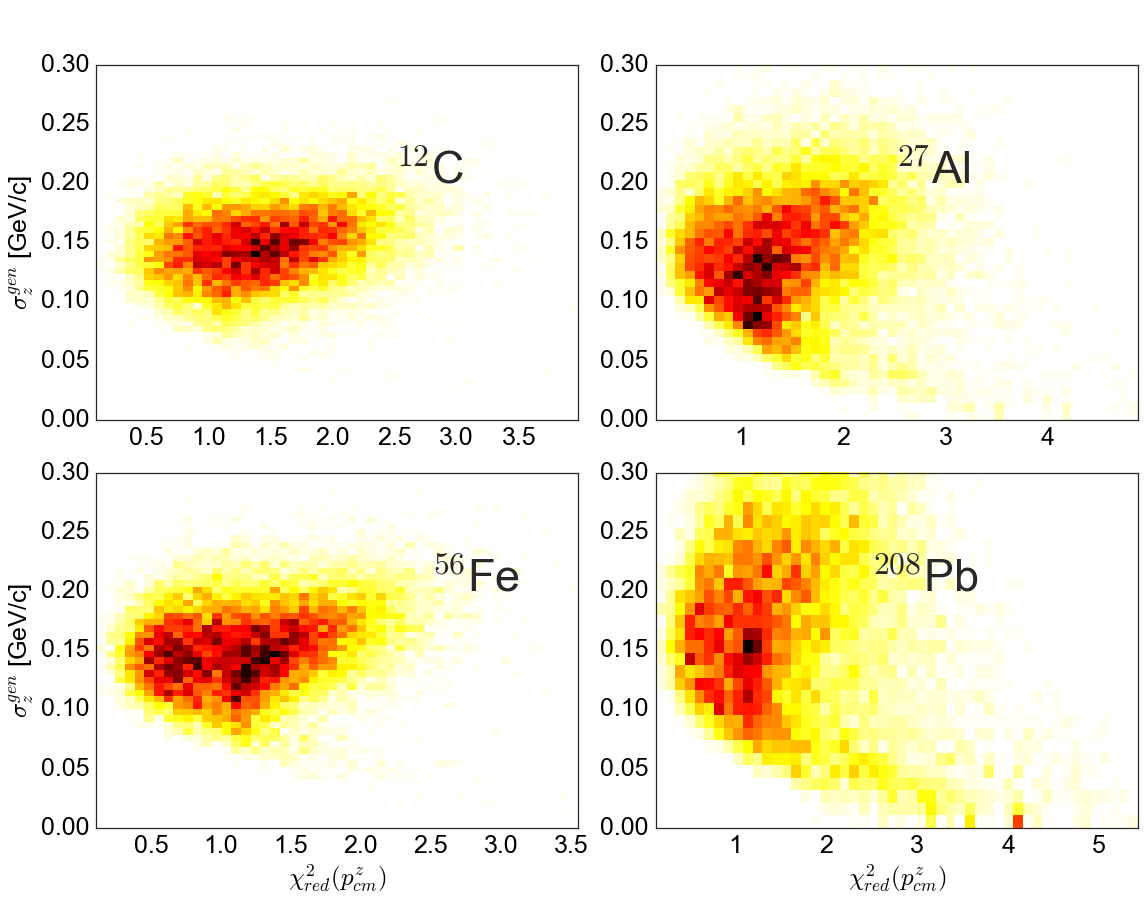

In [23]:
fig=plt.figure(figsize=(16,12))
for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    ax=fig.add_subplot(2,2,i+1)    
#     plt.scatter(good_results['chi2red_data_sim_x'],good_results['gen_Sigma_t'])
    plot_2d_hist(good_results['chi2red_data_sim_z'],good_results['gen_SigmaZ'],bins=50,ax=ax)

    set_axes(ax
             ,x_label=r'$\chi^2_{red}(p_{cm}^{z})$' if i>1 else ''
             ,y_label=r'$\sigma_{z}^{gen}$ [GeV/c]' if i==0 or i==2 else '',ylim=(0,0.3)
            )
    plt.text(2.5,0.2,target_name,fontsize=45)
plt.tight_layout()
plt.savefig(figures_path+'chi2red_data_sim_z_vs_gen_SigmaZ'+'.pdf')

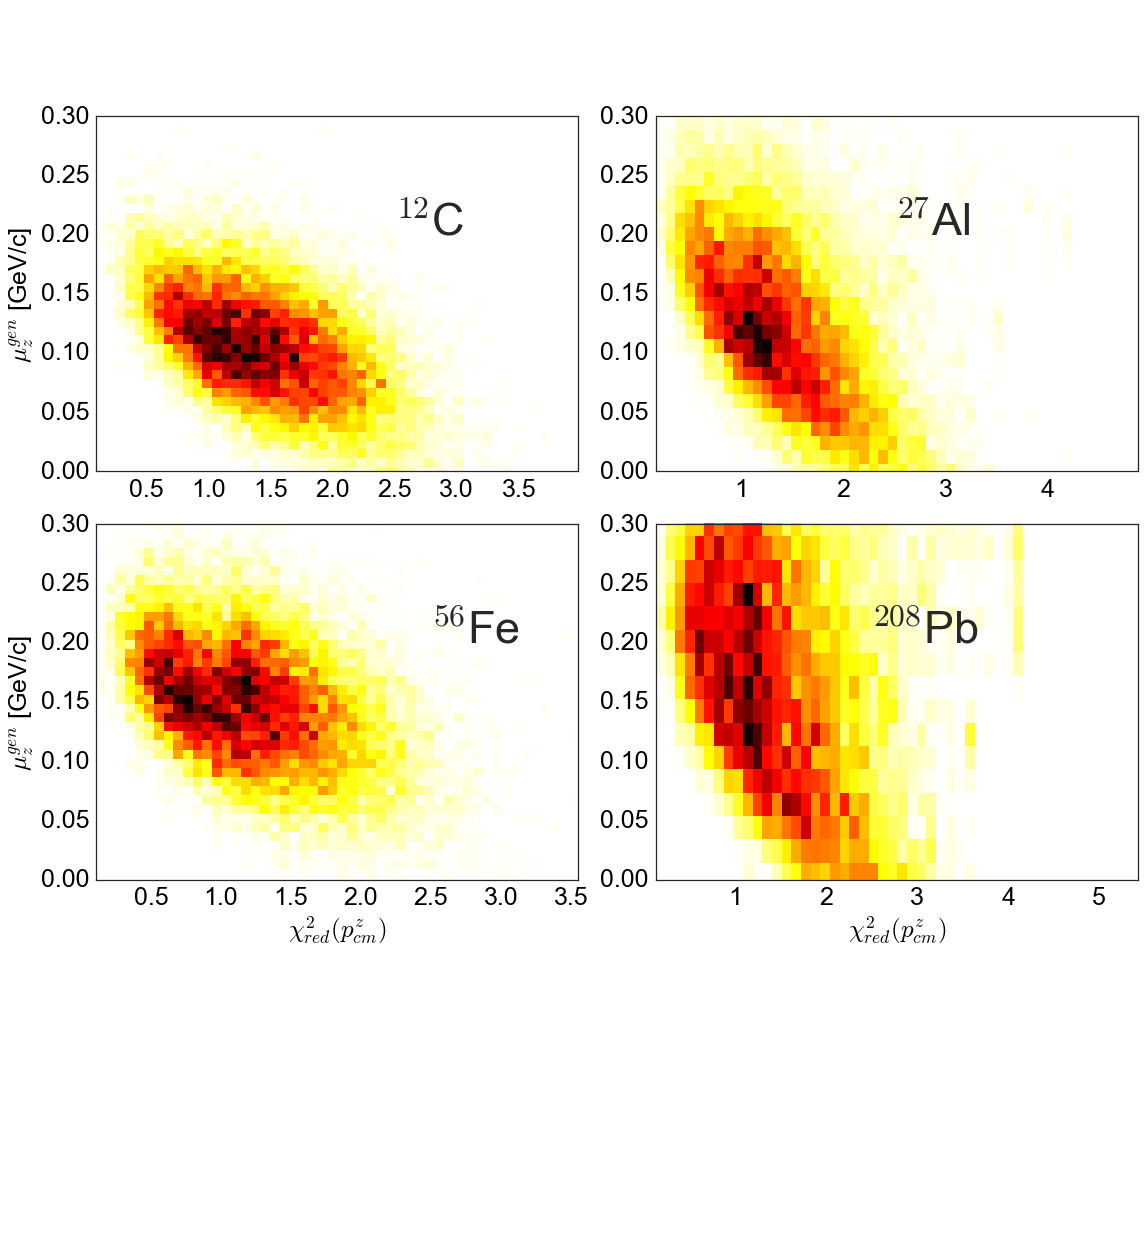

In [24]:
fig=plt.figure(figsize=(16,12))
for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    ax=fig.add_subplot(2,2,i+1)    
#     plt.scatter(good_results['chi2red_data_sim_x'],good_results['gen_Sigma_t'])
    plot_2d_hist(good_results['chi2red_data_sim_z'],good_results['gen_MeanZ'],bins=50,ax=ax)

    set_axes(ax
             ,x_label=r'$\chi^2_{red}(p_{cm}^{z})$' if i>1 else ''
             ,y_label=r'$\mu_{z}^{gen}$ [GeV/c]' if i==0 or i==2 else '',ylim=(0,0.3)
            )
    plt.text(2.5,0.2,target_name,fontsize=45)
plt.tight_layout()
plt.savefig(figures_path+'chi2red_data_sim_z_vs_gen_MeanZ'+'.pdf')

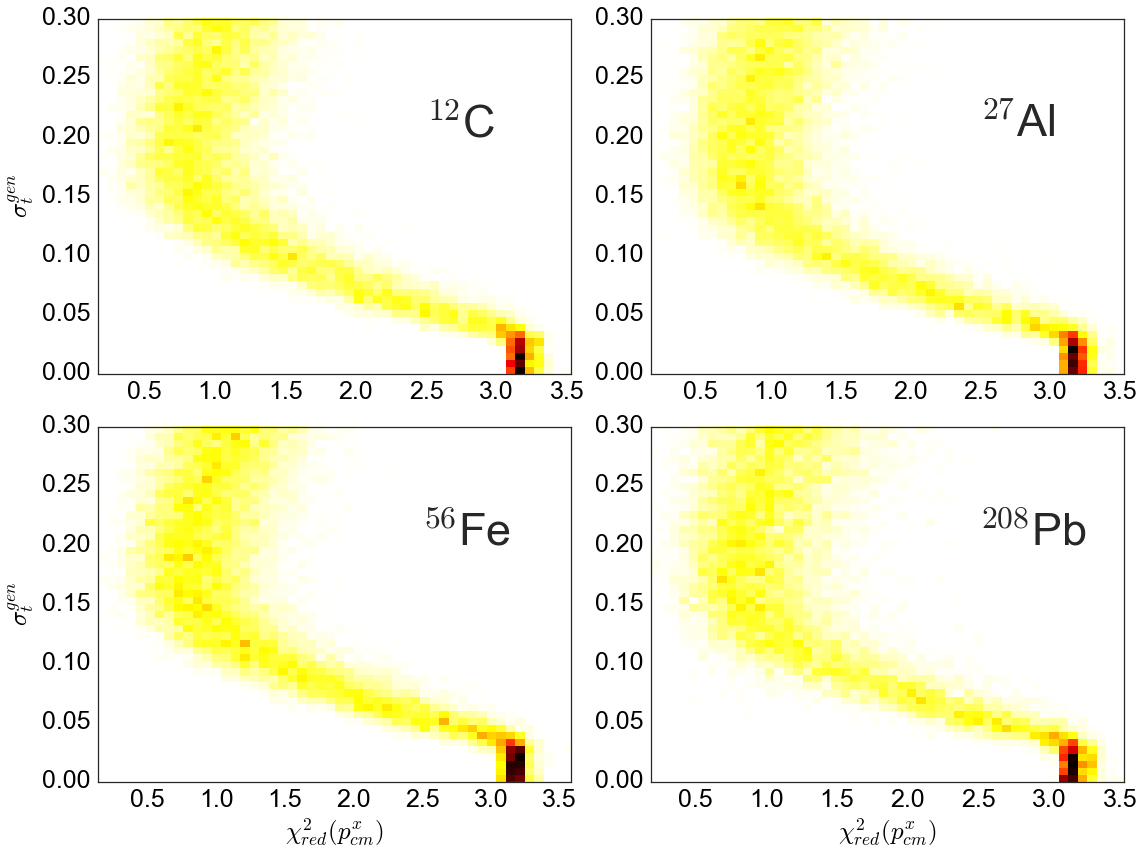

In [28]:
cut_chi2_x = 1.5
# fig=plt.figure(figsize=(16,12))
# for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
#     test_name = "chi2red_"+target
#     sims=simulation_results[test_name]        
#     good_results = sims[
#             (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
#             &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
#     ax=fig.add_subplot(2,2,i+1)    
#     plt.hist(good_results['chi2red_data_sim_x'],bins=np.linspace(0,6,100))
#     set_axes(ax
#              ,x_label=r'$\chi^2_{red}(p_{cm}^{x})$' if i>1 else ''
#              ,y_label=r'$N_{simulations}$' if i==0 or i==2 else ''
#             )
#     plt.plot([cut_chi2_z,cut_chi2_z],ax.get_ylim(),'--',color='red')
#     plt.text(4,0.7*np.max(ax.get_ylim()),target_name,fontsize=45)
# plt.tight_layout()
# plt.savefig(figures_path+'chi2red_data_sim_x'+'.pdf')


fig=plt.figure(figsize=(16,12))
for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    ax=fig.add_subplot(2,2,i+1)    
#     plt.scatter(good_results['chi2red_data_sim_x'],good_results['gen_Sigma_t'])
    plot_2d_hist(good_results['chi2red_data_sim_x'],good_results['gen_Sigma_t'],bins=50,ax=ax)

    set_axes(ax
             ,x_label=r'$\chi^2_{red}(p_{cm}^{x})$' if i>1 else ''
             ,y_label=r'$\sigma_{t}^{gen}$' if i==0 or i==2 else '',ylim=(0,0.3)
            )
    plt.text(2.5,0.2,target_name,fontsize=45)
plt.tight_layout()
plt.savefig(figures_path+'chi2red_data_sim_x_vs_gen_Sigma_t'+'.pdf')

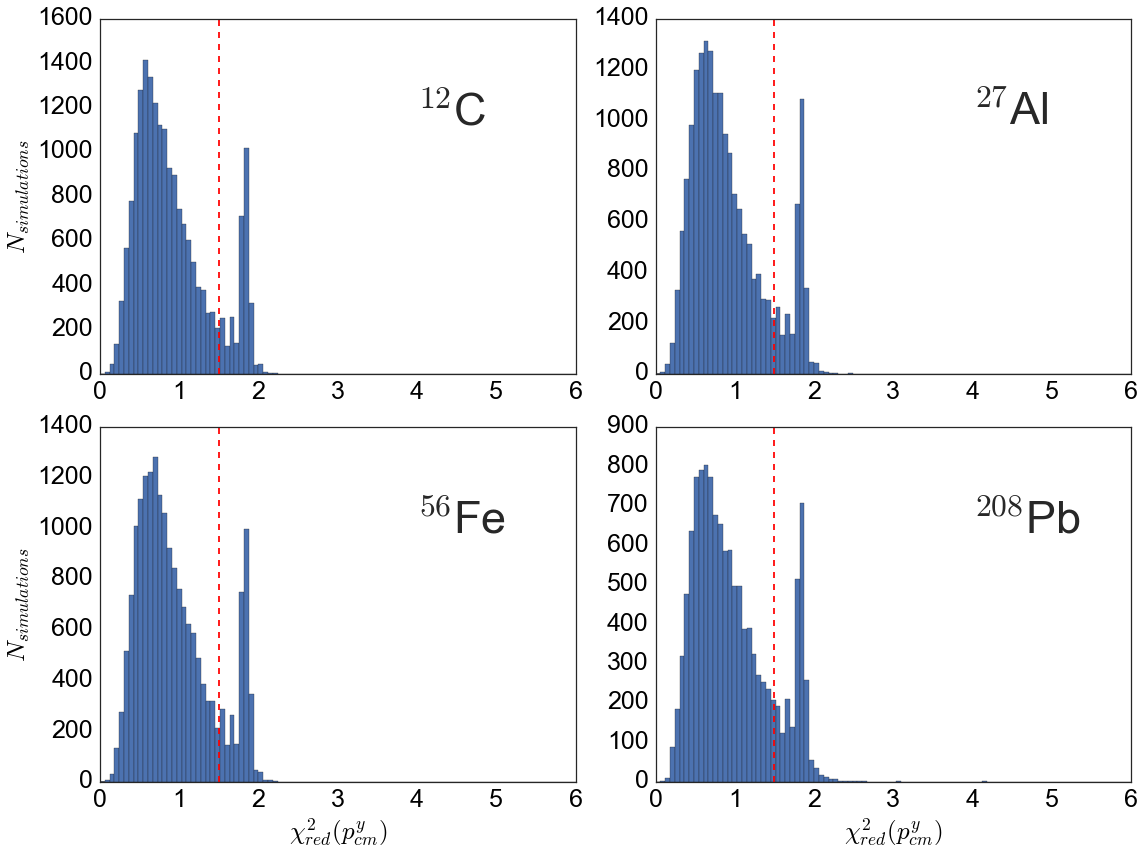

In [29]:

cut_chi2_y = 1.5
fig=plt.figure(figsize=(16,12))
for i,(A,target,target_name) in enumerate(zip(As[0:],targets[0:],target_names[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[
            (sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
            &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)]
    ax=fig.add_subplot(2,2,i+1)    
    plt.hist(good_results['chi2red_data_sim_y'],bins=np.linspace(0,6,100))
    set_axes(ax
             ,x_label=r'$\chi^2_{red}(p_{cm}^{y})$' if i>1 else ''
             ,y_label=r'$N_{simulations}$' if i==0 or i==2 else ''
            )
    plt.plot([cut_chi2_z,cut_chi2_z],ax.get_ylim(),'--',color='red')
    plt.text(4,0.7*np.max(ax.get_ylim()),target_name,fontsize=45)
plt.tight_layout()
plt.savefig(figures_path+'chi2red_data_sim_y'+'.pdf')

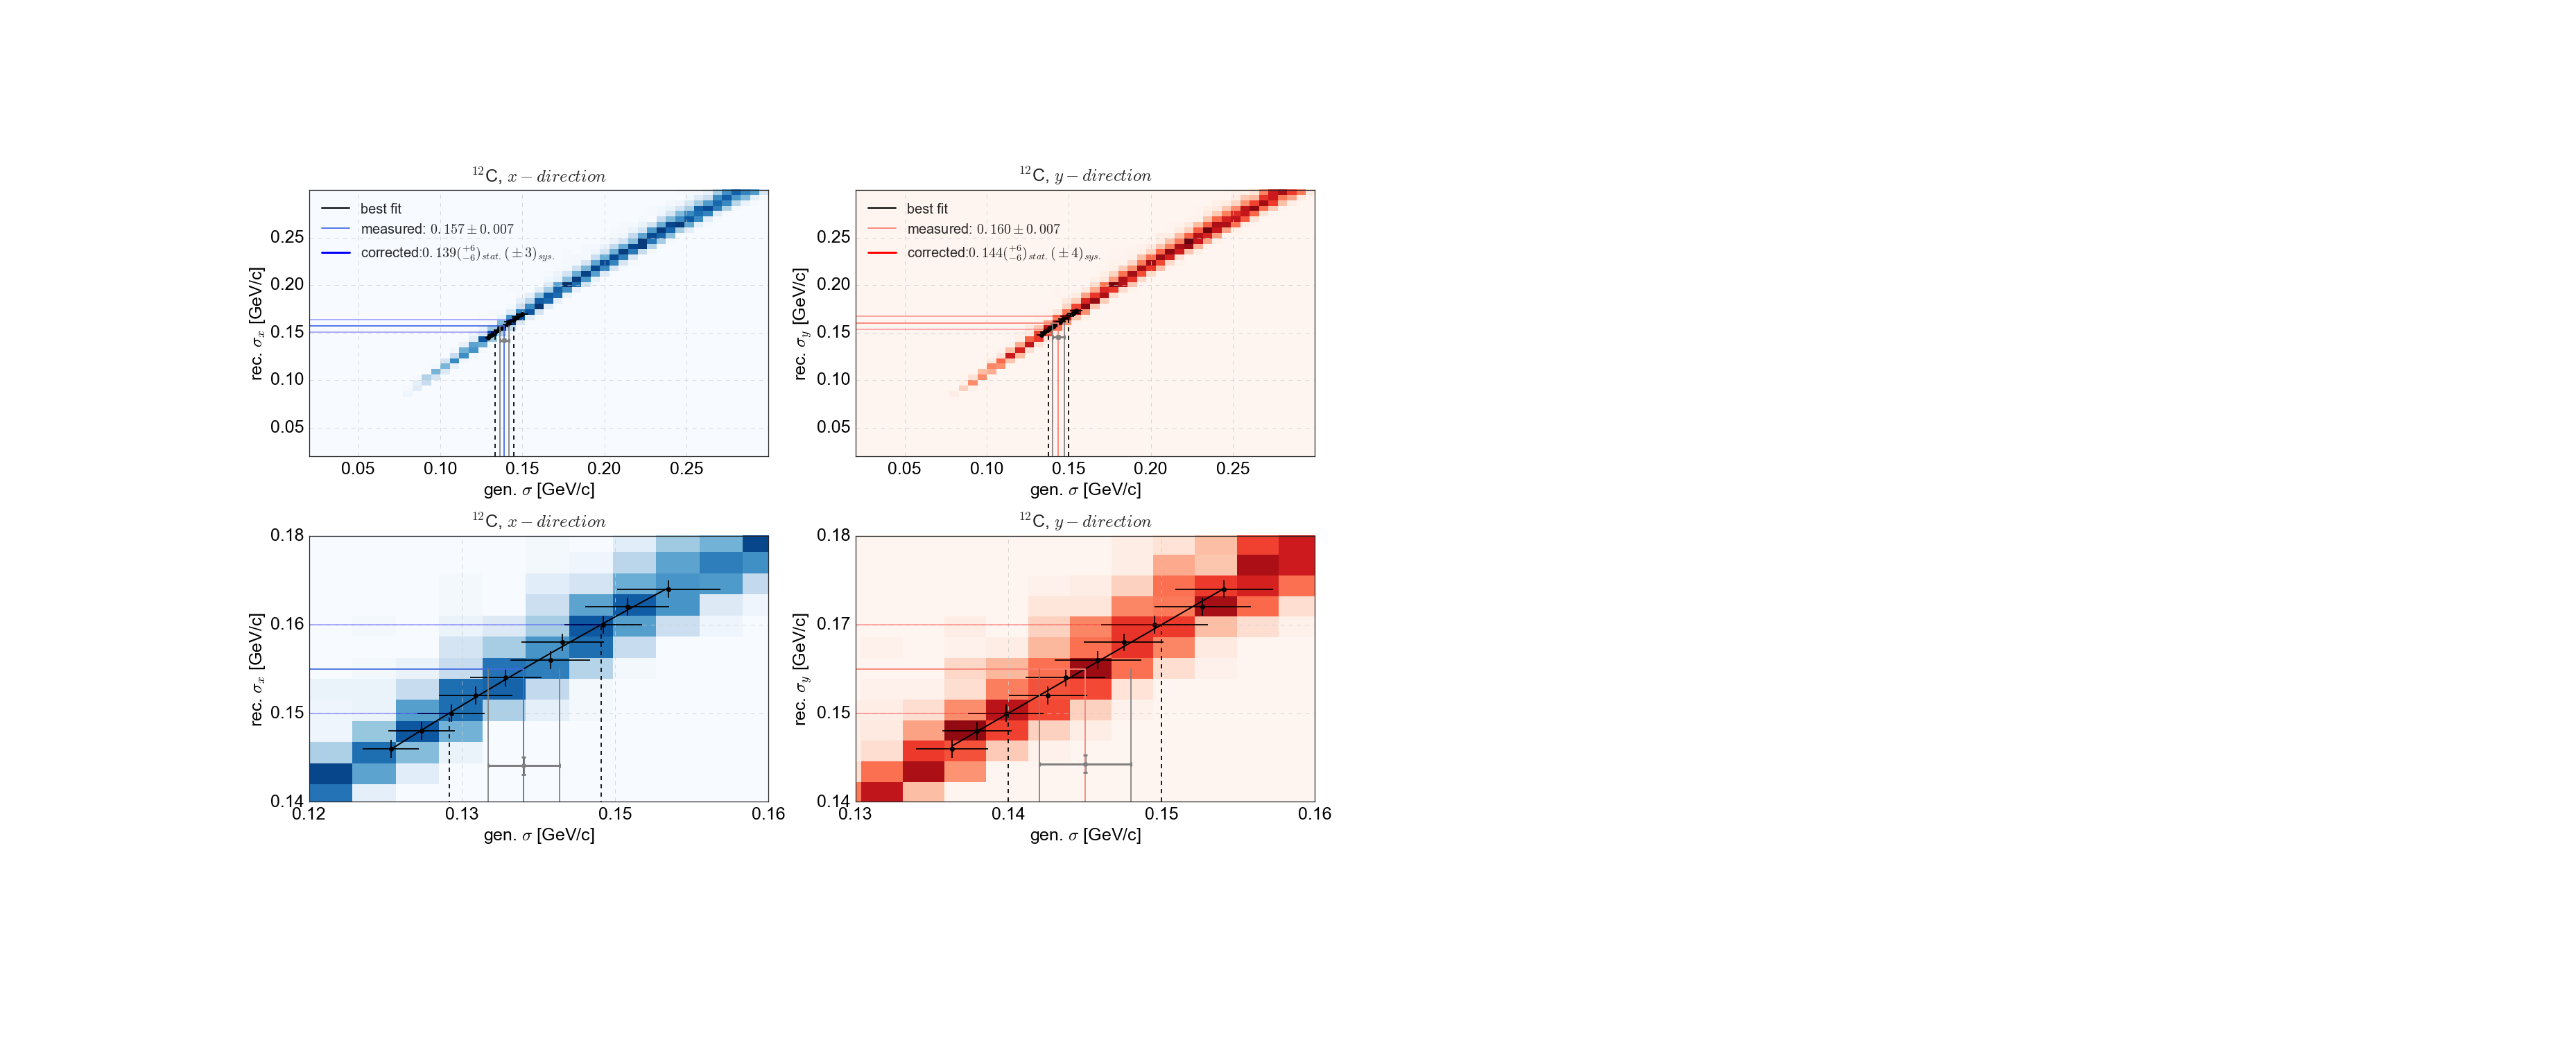

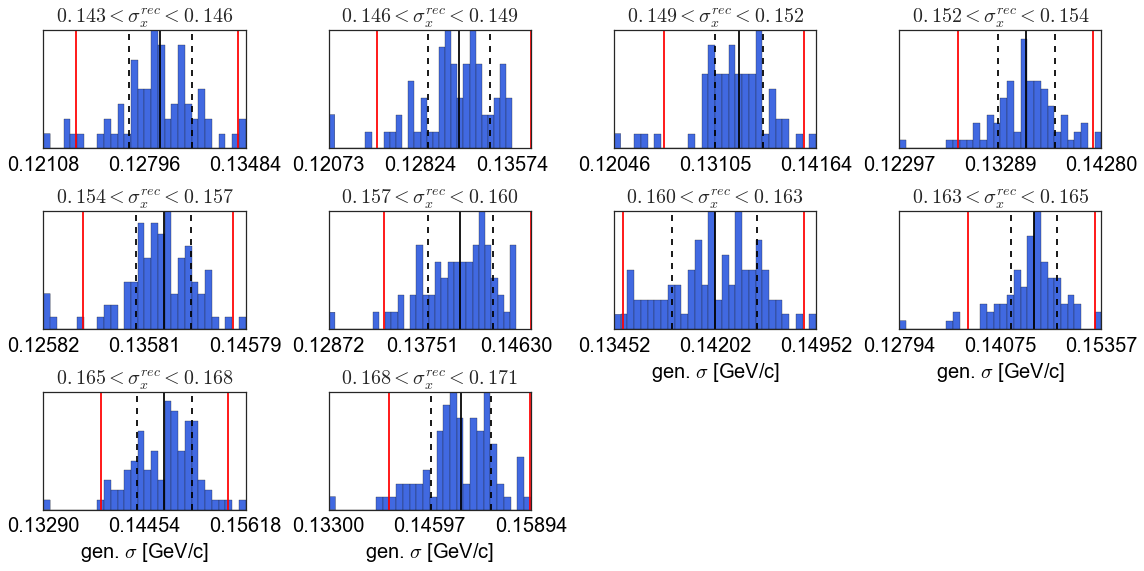

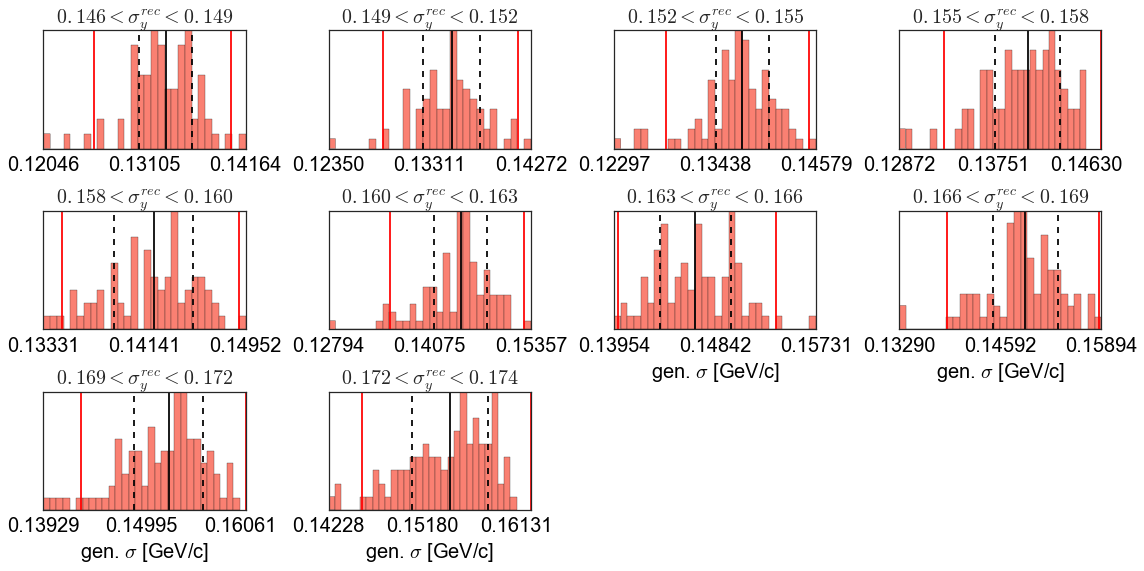

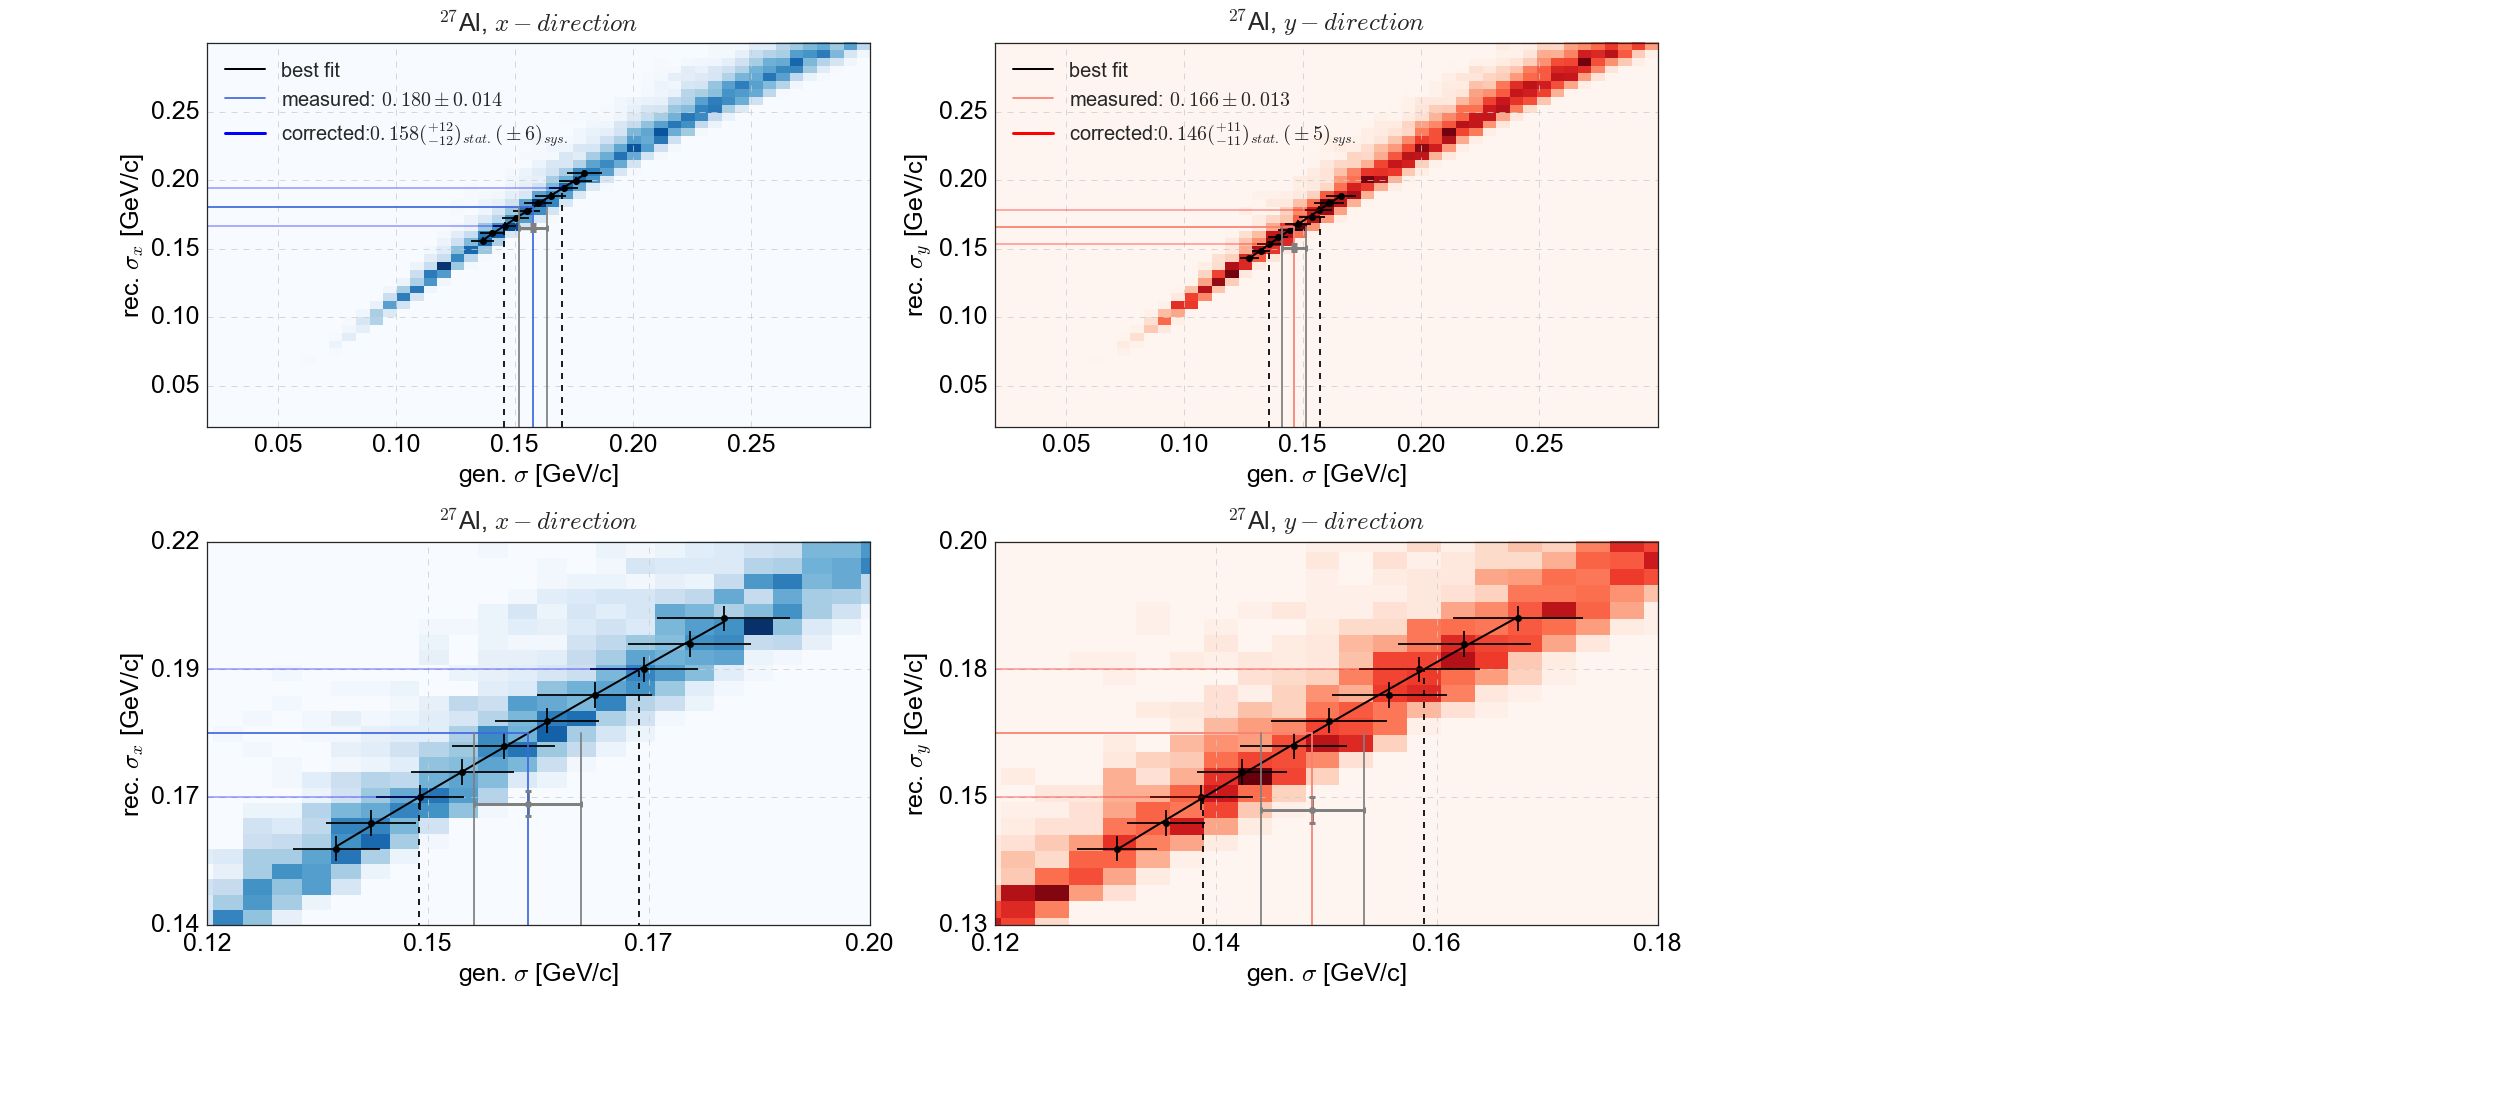

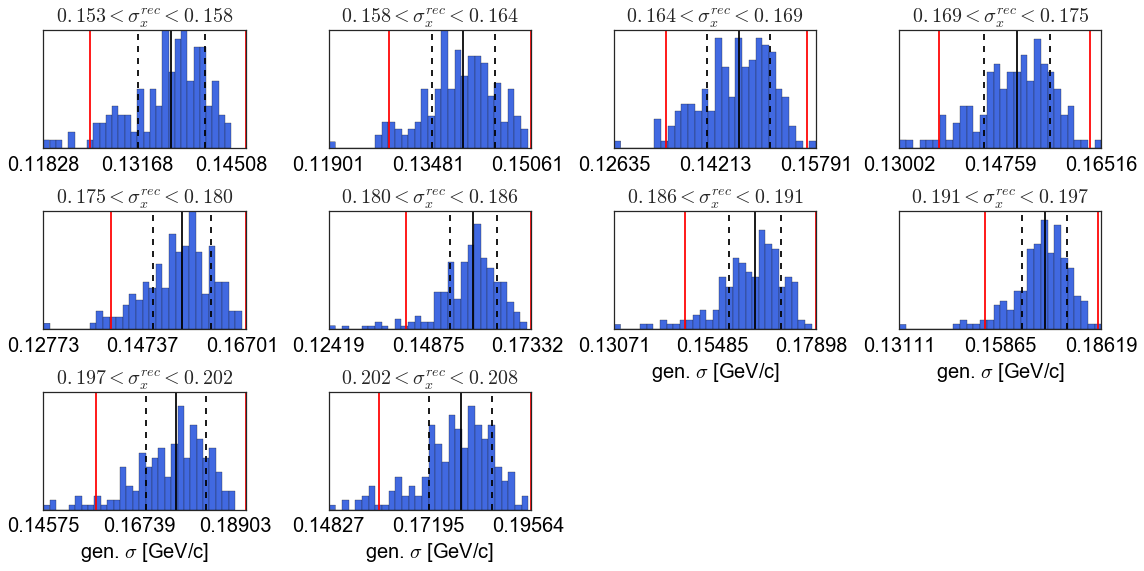

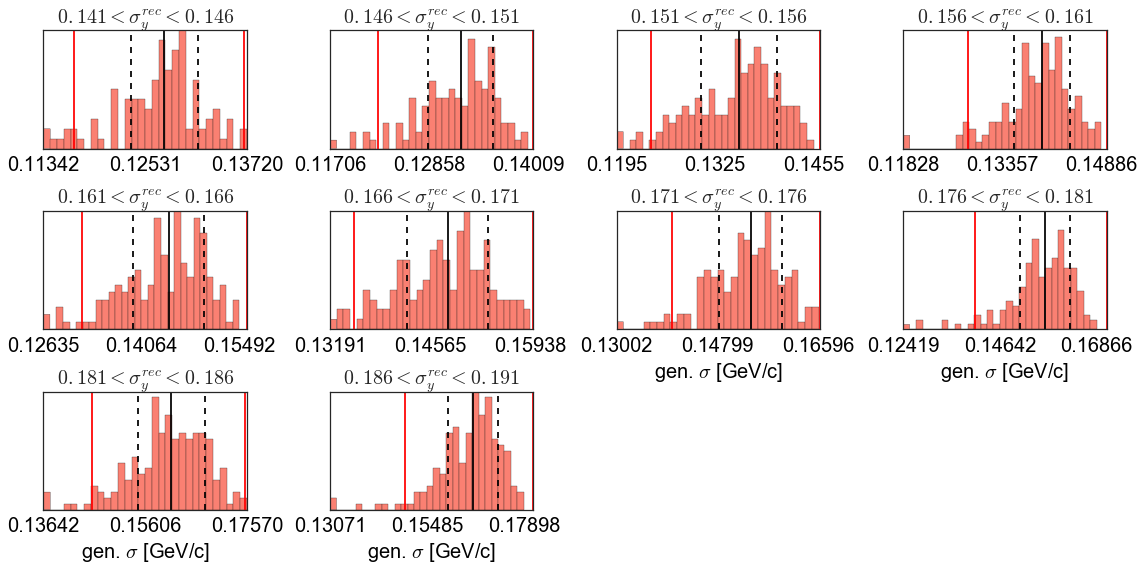

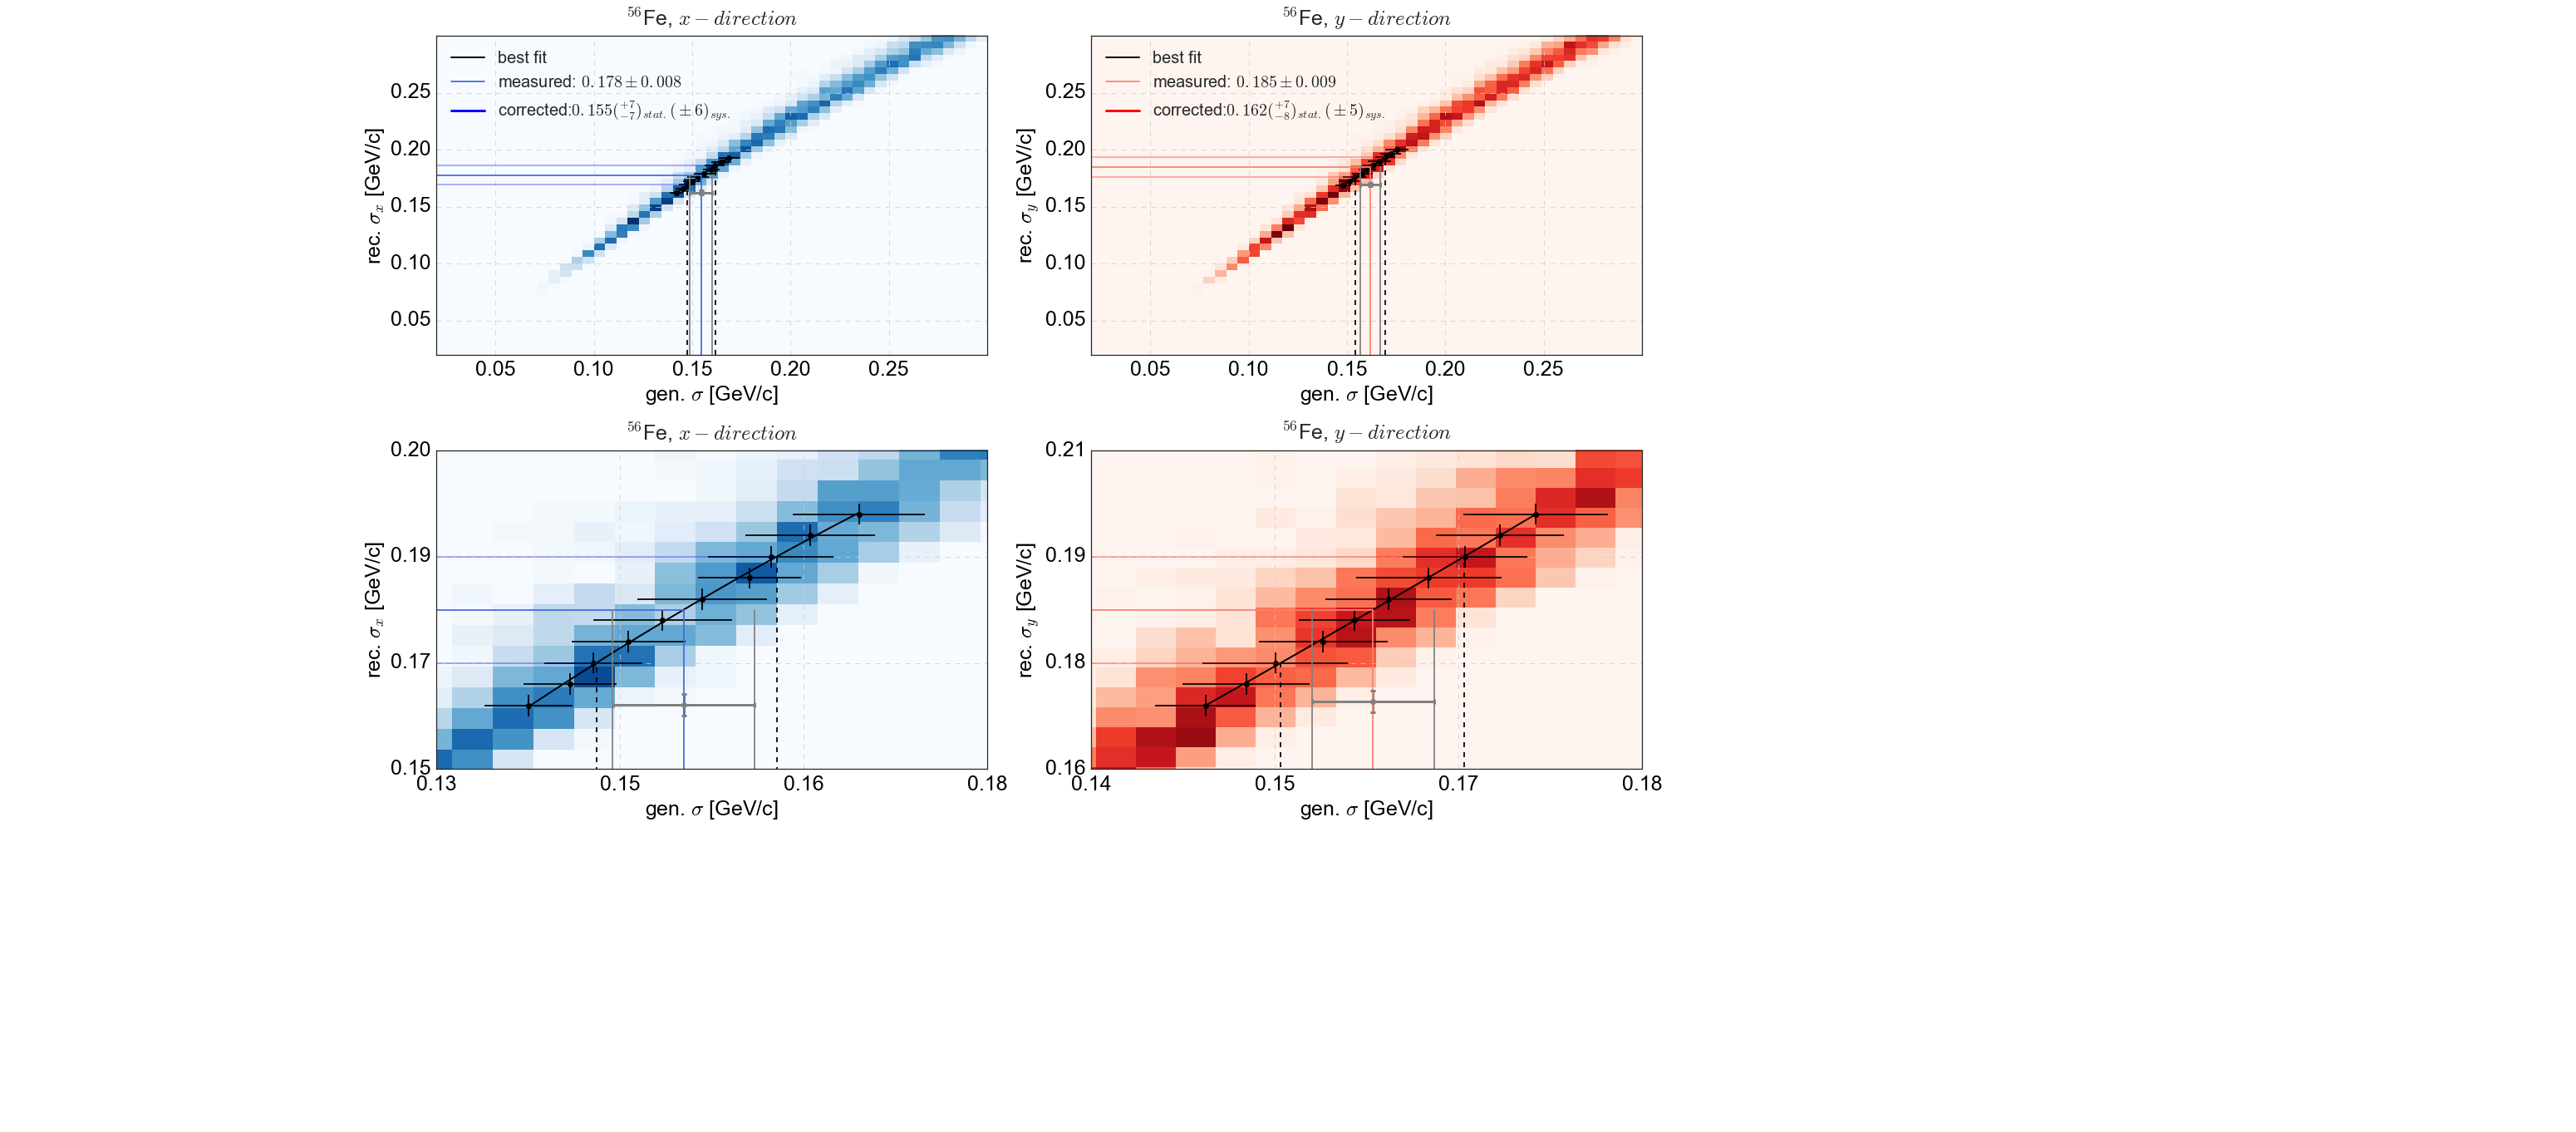

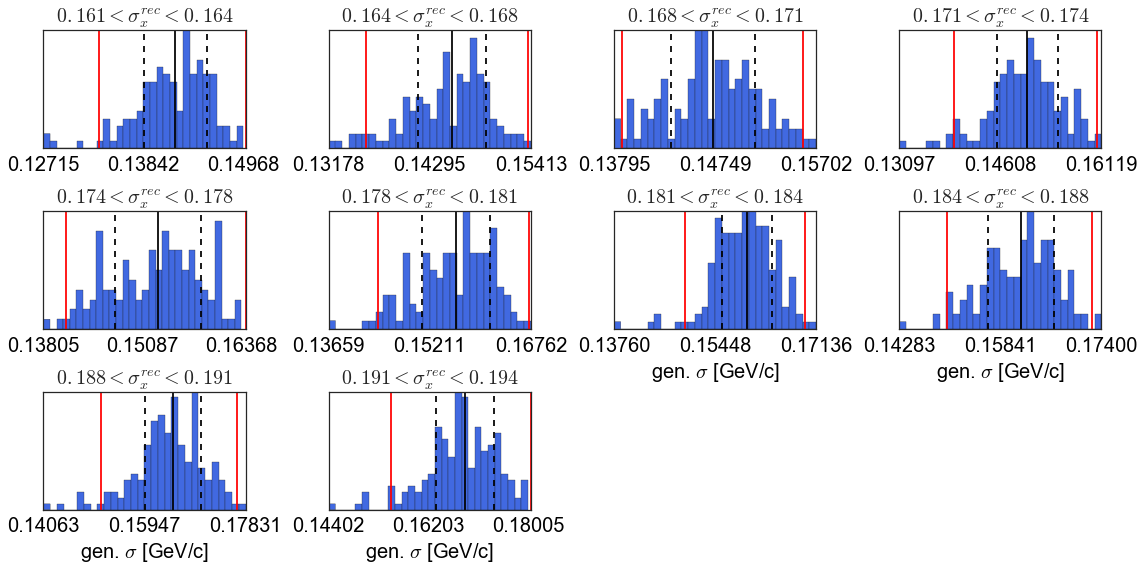

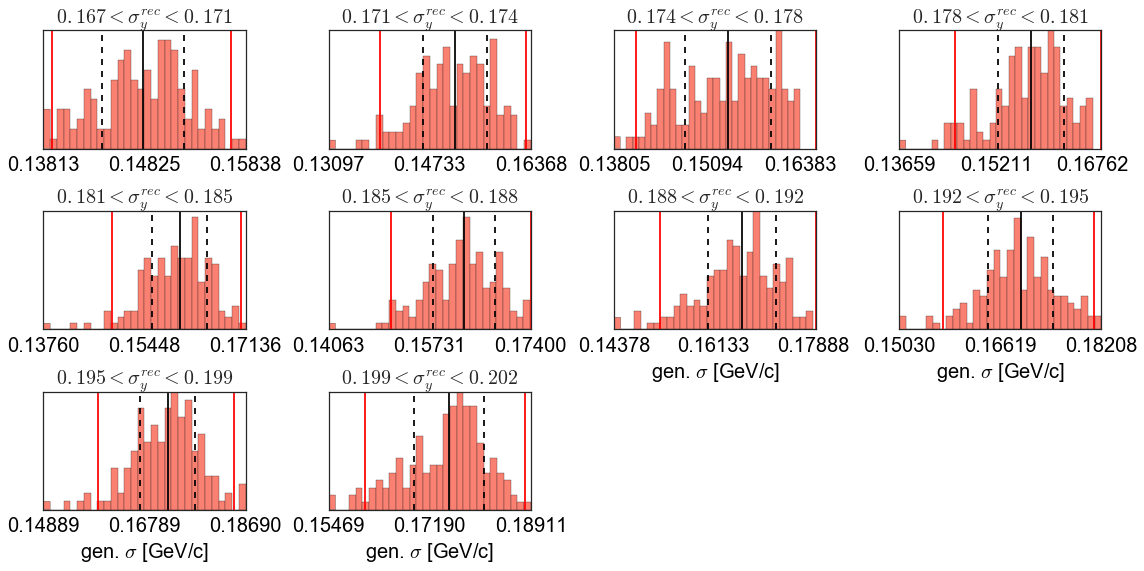

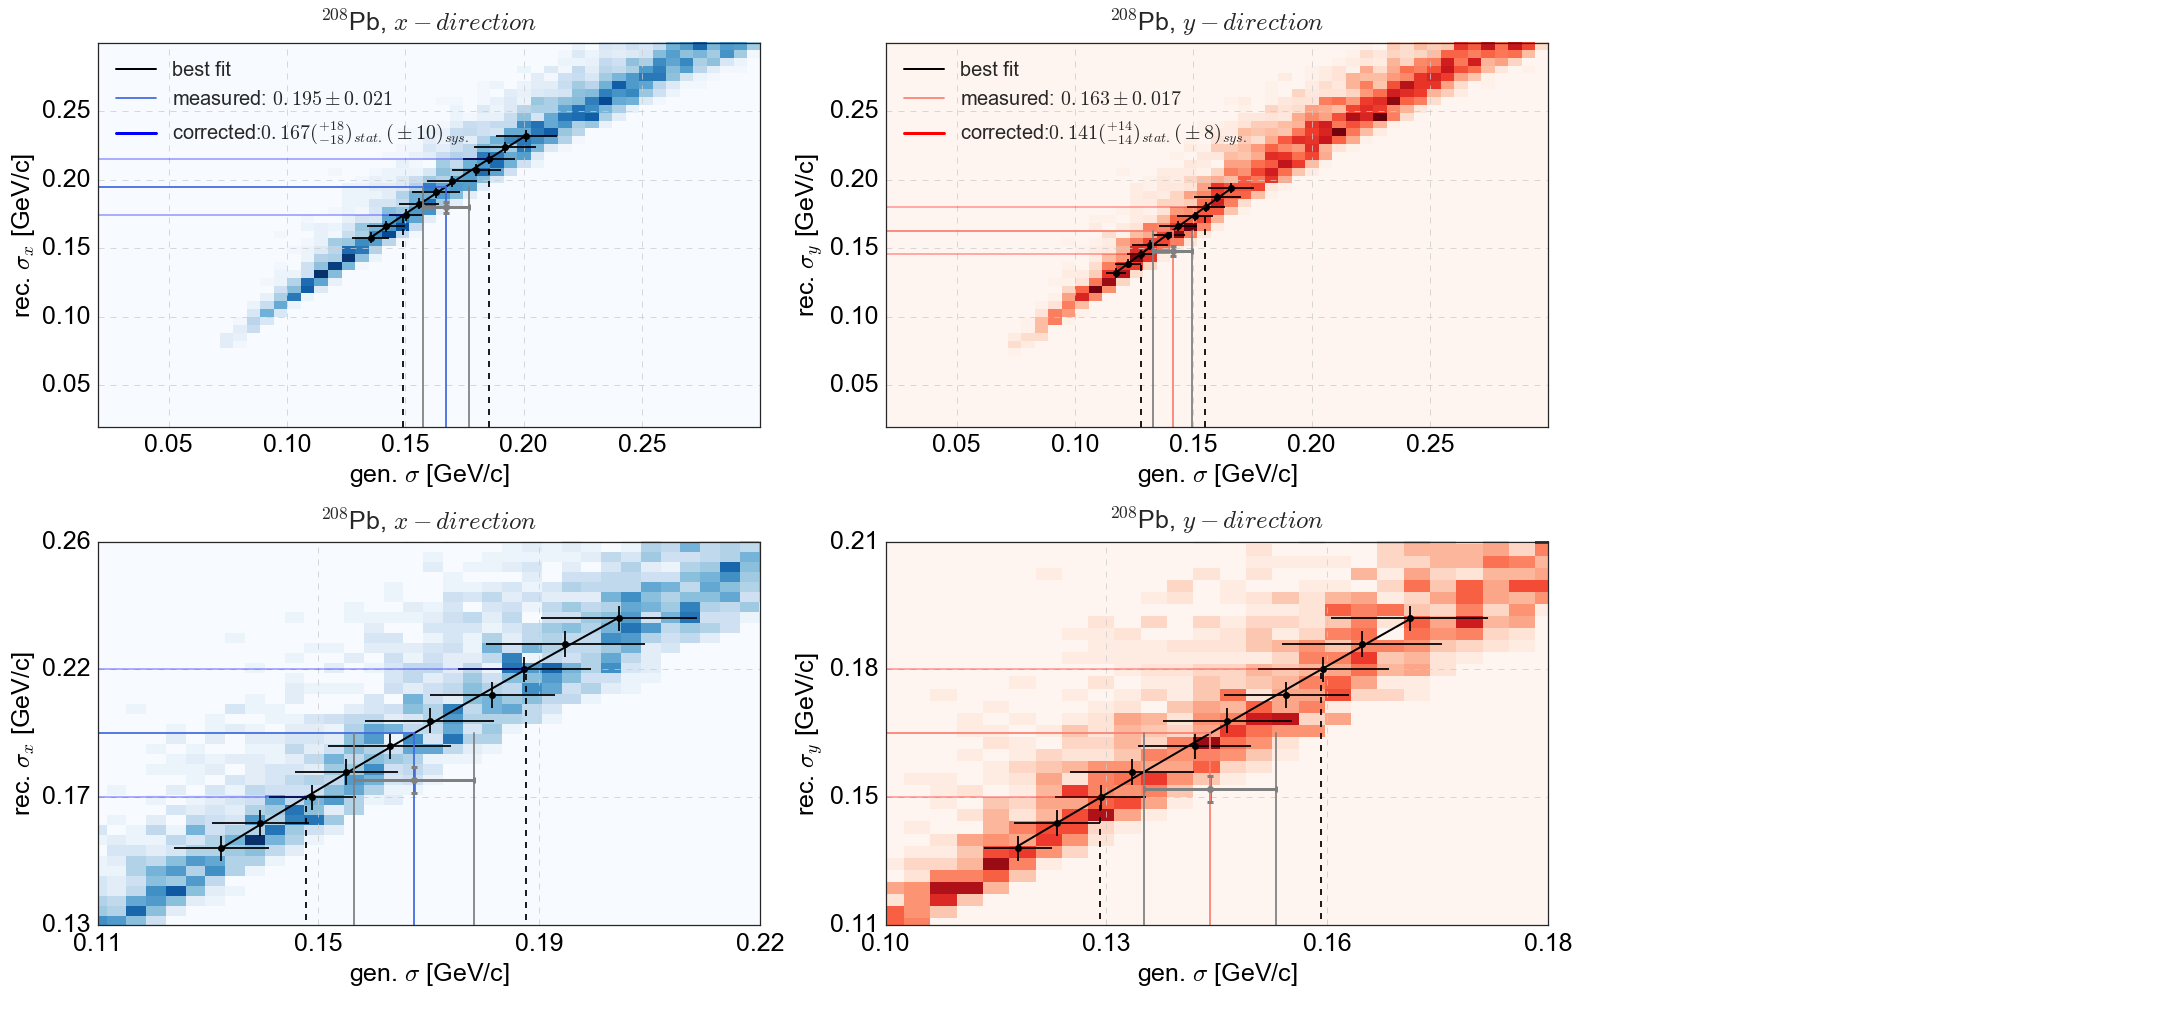

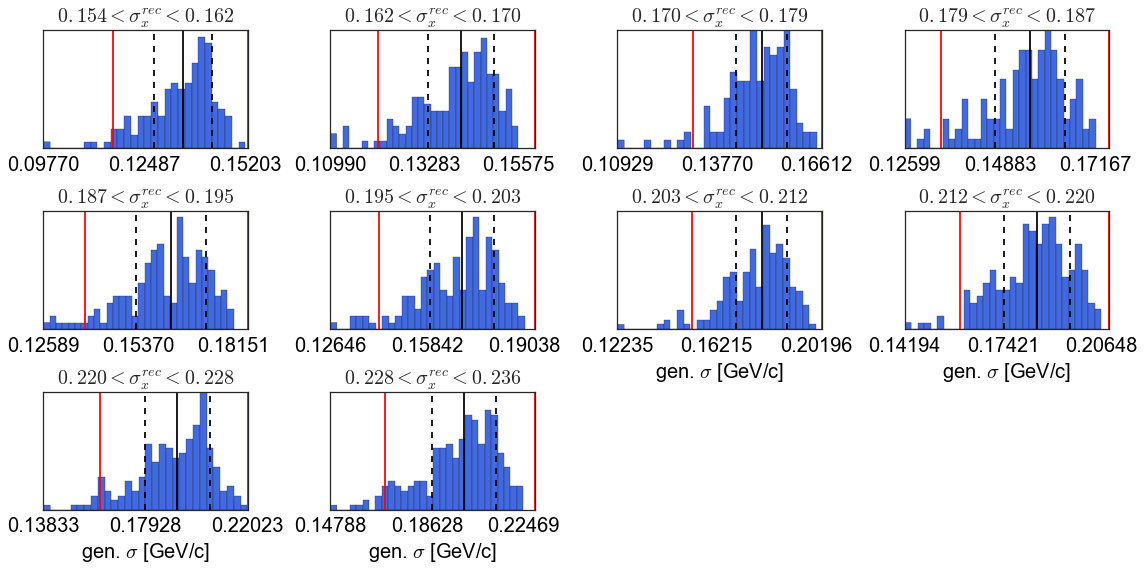

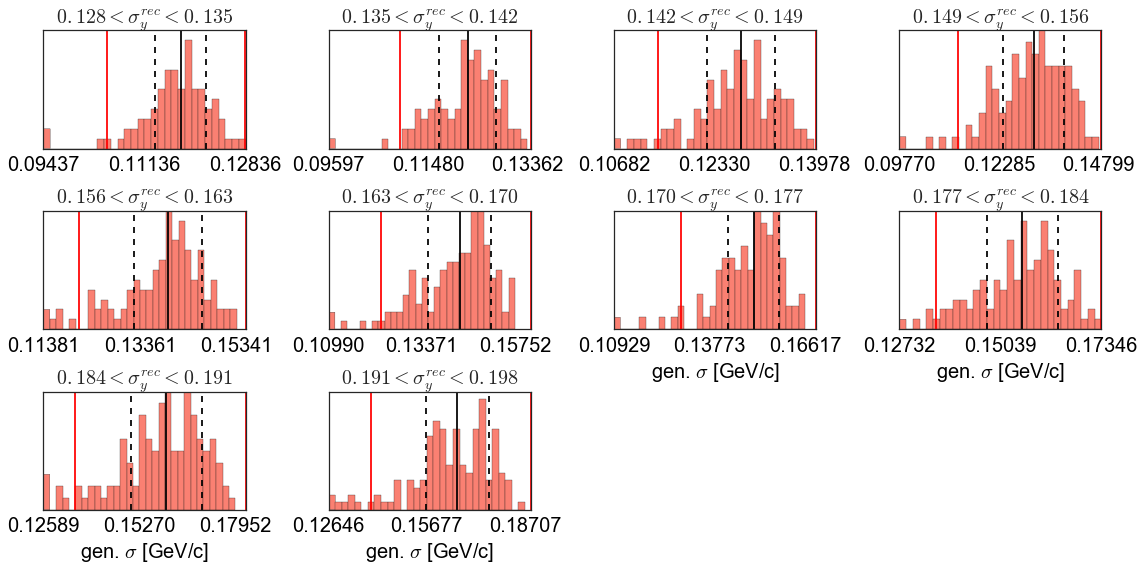

In [30]:
poly_degree = 2 # fit polynomial degree
extraname='chi2_x_y_z<%g'%1.5
for i,(A,target) in enumerate(zip(As[0:],targets[0:])):
    test_name = "chi2red_"+target
    sims=simulation_results[test_name]        
    good_results = sims[(sims['gen_SigmaZ']>0)&(sims['rec_sigma_x']>0)&(sims['rec_sigma_y']>0)&(sims['rec_sigma_z']>0)
                        &(sims['rec_mean_x']>-0.9)&(sims['rec_mean_y']>-0.9)&(sims['rec_mean_x']>-0.9)
#                         &(sims['ks_local_Pval_z']>cut_Pval_z_min)
#                         &(sims['ks_gloabal_Pval_xyz_Fisher']>cut_Pval_xyz_min)
                        &(sims['chi2red_data_sim_x']<cut_chi2_x)
                        &(sims['chi2red_data_sim_y']<cut_chi2_y)
                        &(sims['chi2red_data_sim_z']<cut_chi2_z)
                       ]
    fig=plt.figure(figsize=(22,14))
    ax=fig.add_subplot(2,2,1)    
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0,do_add_1Ddist_in_slices=True)
    ax=fig.add_subplot(2,2,3)    
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree
                                    ,A=A,direction='x'
                                    ,colors=['blue','royalblue','Blues'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

    ax=fig.add_subplot(2,2,2)
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree if A!=12 else 1
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0,do_add_1Ddist_in_slices=True)
    ax=fig.add_subplot(2,2,4)
    plot_cm_direction_binned(sims=good_results, ax=ax,s=3,extraname=extraname
                                    ,poly_degree=poly_degree if A!=12 else 1
                                    ,A=A,direction='y'
                                    ,colors=['red','salmon','Reds'],debug=0
                             ,do_zoom_in=True ,do_add_1Ddist_in_slices=False,do_add_legend=False)

    fig.subplots_adjust(bottom=-0.5,left=-0.2)
    fig.tight_layout() 

In [31]:
sample = cm_parameters_with_correction['PrecFiducials']
for direction in ['x','y']:
    sample['sigma_'+direction+extraname+'_final'] = sample['sigma_'+direction+'_corrected'+extraname]
    for updw in ['up','dw']:
        sample['sigma_'+direction+extraname+'_final_'+updw+'_err'] = sample['sigma_'+direction+'_corrected_'+updw+'_err_tot'+extraname]

corr_x = sample['sigma_x_corrected'+extraname]
Dcorr_x = sample['sigma_x_corrected_err_tot'+extraname]

corr_y = sample['sigma_y_corrected'+extraname]
Dcorr_y = sample['sigma_y_corrected_err_tot'+extraname]

# weighted average
corr_t = (corr_x/np.square(Dcorr_x)+corr_y/np.square(Dcorr_y))/( 1./np.square(Dcorr_x) + 1./np.square(Dcorr_y))
sample['sigma_t'+extraname+'_final'] = corr_t
    
Dsys_x = sample['sigma_x_corrected_err_sys'+extraname]
Dsys_y = sample['sigma_y_corrected_err_sys'+extraname]
Dsys_t = 0.5*( Dsys_x + Dsys_y )
# Dsys_t = np.sqrt(1./( 1./np.square(Dsys_x) + 1./np.square(Dsys_y) ))
sample['sigma_t'+extraname+'_final_err_sys'] = Dsys_t

for updw in ['up','dw']:            
    Dstat_x = sample['sigma_x_corrected_'+updw+'_err_stat'+extraname]
    Dstat_y = sample['sigma_y_corrected_'+updw+'_err_stat'+extraname]
    #     Dstat_t = 0.5*np.sqrt( np.square(Dstat_x) + np.square(Dstat_y) )
    Dstat_t = np.sqrt(1./( 1./np.square(Dstat_x) + 1./np.square(Dstat_y) ))
    sample['sigma_t'+extraname+'_final_'+updw+'_err_stat'] = Dstat_t

    Dtot_t = np.sqrt( np.square(Dstat_t) + np.square(Dsys_t) )
    sample['sigma_t'+extraname+'_final_'+updw+'_err_tot'] = Dtot_t
    sample['sigma_t'+extraname+'_final_'+updw+'_err'] = Dtot_t

sample['sigma_t'+extraname+'_final'] = corr_t

In [32]:
sample['sigma_t'+extraname+'_final']

0    0.141131
1    0.151275
2    0.158274
3    0.150966
Name: sigma_tchi2_x_y_z<1.5_final, dtype: float64

In [33]:
sample['sigma_tchi2_z<1.5_final']

KeyError: 'sigma_tchi2_z<1.5_final'

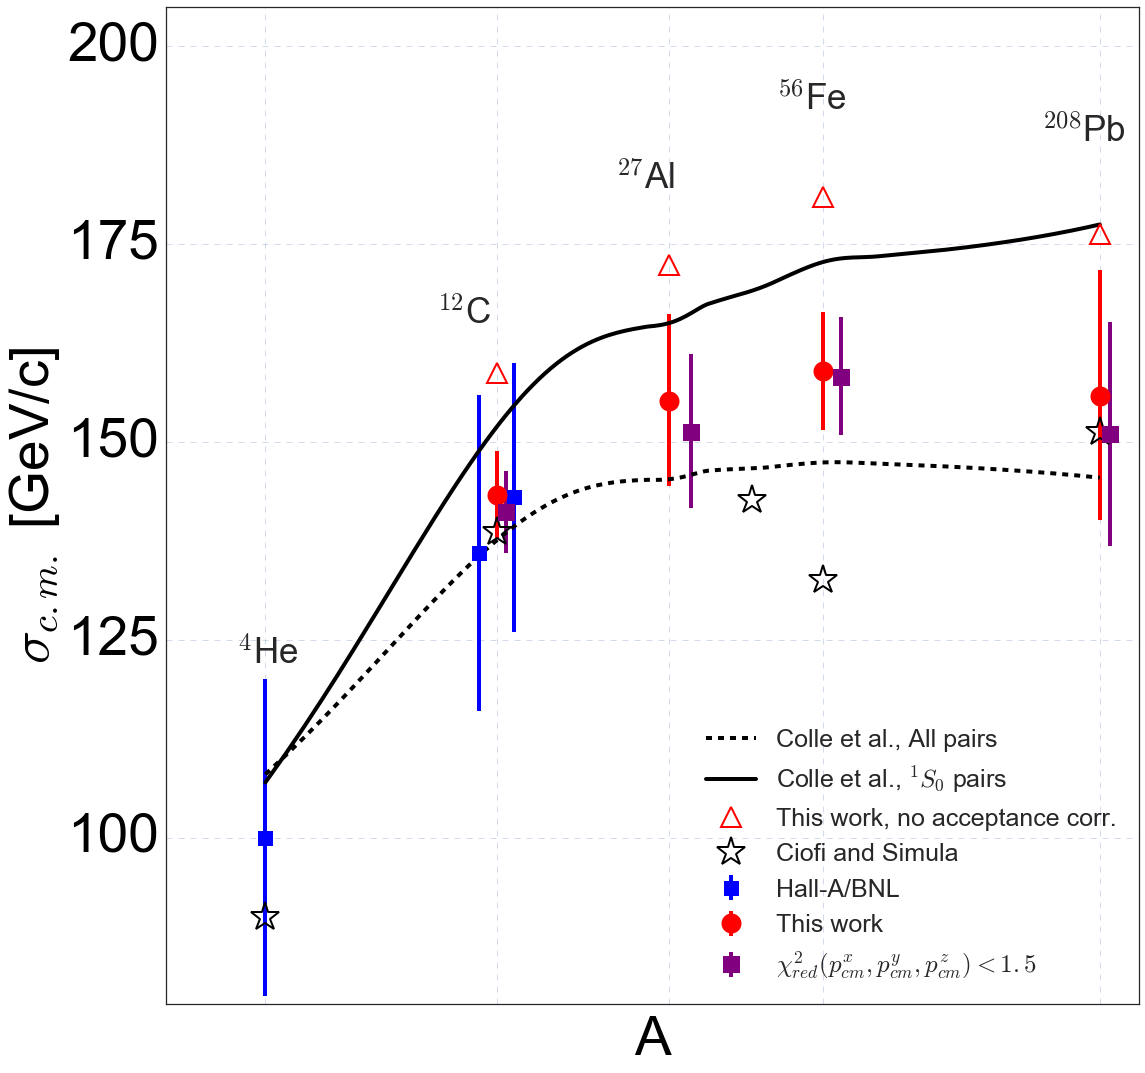

In [34]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)

plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'],direction='t',ax=ax, label="This work" , marker='o', markersize=20 )
plot_data_assymetric( data=cm_parameters_with_correction['PrecFiducials'],direction='t'+extraname,ax=ax
                     , Ashift=[0.5,3,5,10],label=r'$\chi^2_{red}(p_{cm}^{x},p_{cm}^{y},p_{cm}^{z})<%g$'%cut_chi2_z , marker='s', markersize=17,color='purple' )

plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results_chi2_cut_xyz.pdf')